In [51]:
import warnings
warnings.filterwarnings("ignore")

import math
import numpy as np   
import pandas as pd    
import seaborn as sns
import matplotlib.pyplot as plt

from imblearn.over_sampling import SMOTE
from xgboost import XGBClassifier
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    confusion_matrix, 
    classification_report, 
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    make_scorer
)
from sklearn.ensemble import (
    BaggingClassifier,
    RandomForestClassifier,
    GradientBoostingClassifier,
    AdaBoostClassifier,
    StackingClassifier
)
from sklearn.model_selection import (
    train_test_split,
    StratifiedKFold,
    cross_val_score,
    GridSearchCV,
    RandomizedSearchCV
)

# to suppress scientific notations
pd.set_option('display.float_format', lambda x: '%.3f' % x)
%matplotlib inline
sns.set()

In [52]:
data = pd.read_csv('train_loan_data (1).csv')
df = data.copy()

In [53]:
df.head()

,addr_state,annual_inc,earliest_cr_line,emp_length,emp_title,fico_range_high,fico_range_low,grade,home_ownership,application_type,...,pub_rec_bankruptcies,purpose,revol_bal,revol_util,sub_grade,term,title,total_acc,verification_status,loan_status
0,CO,85000.000,Jul-97,10+ years,Deputy,744,740,E,MORTGAGE,Individual,...,0.000,debt_consolidation,5338,93.600,E1,60 months,Debt consolidation,8,Source Verified,Defaulted
1,CA,40000.000,Apr-87,10+ years,Department of Veterans Affairs,724,720,B,RENT,Individual,...,0.000,debt_consolidation,19944,60.300,B1,36 months,Credit Loan,12,Verified,Paid
2,FL,60000.000,Aug-07,10+ years,Marble polishing,679,675,B,MORTGAGE,Individual,...,0.000,debt_consolidation,23199,88.500,B5,36 months,Debt consolidation,16,Source Verified,Paid
3,IL,100742.000,Sep-80,10+ years,printer,664,660,B,MORTGAGE,Individual,...,0.000,debt_consolidation,18425,69.000,B2,36 months,Debt consolidation,19,Source Verified,Paid
4,MD,80000.000,Jul-99,10+ years,Southern Mgmt,669,665,F,RENT,Individual,...,0.000,debt_consolidation,34370,90.000,F5,60 months,Debt Connsolidation,59,Verified,Paid


In [54]:
df.shape


(80000, 28)

In [55]:
df.replace({'loan_status':{'Paid': 0, 'Defaulted':1}}, inplace=True)

In [56]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80000 entries, 0 to 79999
Data columns (total 28 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   addr_state            80000 non-null  object 
 1   annual_inc            80000 non-null  float64
 2   earliest_cr_line      80000 non-null  object 
 3   emp_length            75412 non-null  object 
 4   emp_title             74982 non-null  object 
 5   fico_range_high       80000 non-null  int64  
 6   fico_range_low        80000 non-null  int64  
 7   grade                 80000 non-null  object 
 8   home_ownership        80000 non-null  object 
 9   application_type      80000 non-null  object 
 10  initial_list_status   80000 non-null  object 
 11  int_rate              80000 non-null  float64
 12  loan_amnt             80000 non-null  int64  
 13  num_actv_bc_tl        76052 non-null  float64
 14  mort_acc              77229 non-null  float64
 15  tot_cur_bal        

In [57]:
df.head()

,addr_state,annual_inc,earliest_cr_line,emp_length,emp_title,fico_range_high,fico_range_low,grade,home_ownership,application_type,...,pub_rec_bankruptcies,purpose,revol_bal,revol_util,sub_grade,term,title,total_acc,verification_status,loan_status
0,CO,85000.000,Jul-97,10+ years,Deputy,744,740,E,MORTGAGE,Individual,...,0.000,debt_consolidation,5338,93.600,E1,60 months,Debt consolidation,8,Source Verified,1
1,CA,40000.000,Apr-87,10+ years,Department of Veterans Affairs,724,720,B,RENT,Individual,...,0.000,debt_consolidation,19944,60.300,B1,36 months,Credit Loan,12,Verified,0
2,FL,60000.000,Aug-07,10+ years,Marble polishing,679,675,B,MORTGAGE,Individual,...,0.000,debt_consolidation,23199,88.500,B5,36 months,Debt consolidation,16,Source Verified,0
3,IL,100742.000,Sep-80,10+ years,printer,664,660,B,MORTGAGE,Individual,...,0.000,debt_consolidation,18425,69.000,B2,36 months,Debt consolidation,19,Source Verified,0
4,MD,80000.000,Jul-99,10+ years,Southern Mgmt,669,665,F,RENT,Individual,...,0.000,debt_consolidation,34370,90.000,F5,60 months,Debt Connsolidation,59,Verified,0


In [58]:
df.isnull().sum().sort_values(ascending=False)

emp_title               5018
emp_length              4588
num_actv_bc_tl          3948
tot_cur_bal             3948
mort_acc                2771
title                    970
revol_util                53
pub_rec_bankruptcies      31
open_acc                   0
verification_status        0
total_acc                  0
term                       0
sub_grade                  0
revol_bal                  0
purpose                    0
pub_rec                    0
addr_state                 0
annual_inc                 0
loan_amnt                  0
int_rate                   0
initial_list_status        0
application_type           0
home_ownership             0
grade                      0
fico_range_low             0
fico_range_high            0
earliest_cr_line           0
loan_status                0
dtype: int64

In [59]:
df.isnull().sum()

addr_state                 0
annual_inc                 0
earliest_cr_line           0
emp_length              4588
emp_title               5018
fico_range_high            0
fico_range_low             0
grade                      0
home_ownership             0
application_type           0
initial_list_status        0
int_rate                   0
loan_amnt                  0
num_actv_bc_tl          3948
mort_acc                2771
tot_cur_bal             3948
open_acc                   0
pub_rec                    0
pub_rec_bankruptcies      31
purpose                    0
revol_bal                  0
revol_util                53
sub_grade                  0
term                       0
title                    970
total_acc                  0
verification_status        0
loan_status                0
dtype: int64

In [60]:
df.duplicated().sum()


0

In [61]:
cat_cols = df.select_dtypes(include='object').columns
df[cat_cols] = df[cat_cols].astype('category')
df.select_dtypes(include='category').columns

Index(['addr_state', 'earliest_cr_line', 'emp_length', 'emp_title', 'grade',
       'home_ownership', 'application_type', 'initial_list_status', 'purpose',
       'sub_grade', 'term', 'title', 'verification_status'],
      dtype='object')

In [62]:
for i in df.select_dtypes(include=['category']).columns:
    print('Unique values in', i, 'are :')
    print(df[i].value_counts(dropna=False))
    print('*'*50)

Unique values in addr_state are :
addr_state
CA    11744
TX     6493
NY     6461
FL     5618
IL     3098
NJ     2853
PA     2676
OH     2575
GA     2530
NC     2291
VA     2249
MI     2091
AZ     1993
MA     1862
MD     1802
CO     1790
WA     1736
MN     1414
IN     1329
MO     1298
NV     1224
TN     1207
CT     1143
WI     1043
OR     1025
SC     1007
AL      986
LA      928
KY      836
OK      725
KS      649
AR      590
UT      554
NM      440
HI      404
MS      373
NH      373
RI      356
WV      268
NE      240
MT      229
DE      219
AK      215
DC      201
SD      192
WY      187
VT      181
ME      110
ID      106
ND       85
IA        1
Name: count, dtype: int64
**************************************************
Unique values in earliest_cr_line are :
earliest_cr_line
Sep-03    547
Aug-03    545
Aug-01    544
Oct-01    541
Sep-02    539
         ... 
Jul-65      1
Sep-59      1
Sep-65      1
Jul-64      1
Nov-66      1
Name: count, Length: 640, dtype: int64
****************

In [63]:
def histogram_boxplot(feature, figsize=(15, 7), bins=None):
    """ 
    Boxplot and histogram combined
    feature: 1-d feature array
    figsize: size of fig (default (15,10))
    bins: number of bins (default None / auto)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(nrows = 2, # Number of rows of the subplot grid= 2
                                           sharex = True, # x-axis will be shared among all subplots
                                           gridspec_kw = {"height_ratios": (.25, .75)}, 
                                           figsize = figsize 
                                           ) # creating the 2 subplots
    
    sns.boxplot(feature, ax=ax_box2, showmeans=True, color='yellow') # boxplot will be created and a star will indicate the mean value of the column
    sns.distplot(feature, kde=True, ax=ax_hist2, bins=bins) if bins else sns.distplot(feature, kde=True, ax=ax_hist2) # For histogram
    ax_hist2.axvline(np.mean(feature), color='green', linestyle='--') # Add mean to the histogram
    ax_hist2.axvline(np.median(feature), color='blue', linestyle='-');# Add median to the histogram

In [64]:
def perc_on_bar(feature):
    '''
    plot
    feature: categorical feature
    the function won't work if a column is passed in hue parameter
    '''
    #Creating a countplot for the feature
    sns.set(rc={'figure.figsize':(15,7)})
    ax=sns.countplot(x=feature, data=data, palette='mako')
    
    total = len(feature) # length of the column
    for p in ax.patches:
        # percentage of each class of the category
        percentage = 100 * p.get_height()/total
        percentage_label = f"{percentage:.1f}%"
        x = p.get_x() + p.get_width() / 2 - 0.05 # width of the plot
        y = p.get_y() + p.get_height()           # hieght of the plot
        ax.annotate(percentage_label, (x, y), size = 12) # annotate the percantage
        
    plt.show() # show the plot

In [65]:
### Function to plot distributions and Boxplots of customers
def target_plot(x, target='loan_status'):
    '''
    plot
    feature: categorical feature
    the function won't work if a column is passed in hue parameter
    '''
    fig,axs = plt.subplots(2, 2, figsize=(12,10))
    axs[0, 0].set_title('Distribution of an loan_status')
    sns.distplot(data[(data[target] == 1)][x], ax=axs[0,0], color='teal')
    axs[0, 1].set_title('Distribution of an non-loan_status')
    sns.distplot(data[(data[target] == 0)][x], ax=axs[0,1], color='orange')
    
    axs[1,0].set_title('Boxplot w.r.t loan_status')
    sns.boxplot(data[target],data[x], ax=axs[1,0],palette='gist_rainbow')
    axs[1,1].set_title('Boxplot w.r.t non-loan_status - Without outliers')
    sns.boxplot(data[target],data[x],ax=axs[1,1],showfliers=False,palette='gist_rainbow')
    plt.tight_layout()
    plt.show()

In [66]:
df.select_dtypes(include='integer').columns


Index(['fico_range_high', 'fico_range_low', 'loan_amnt', 'open_acc', 'pub_rec',
       'revol_bal', 'total_acc', 'loan_status'],
      dtype='object')

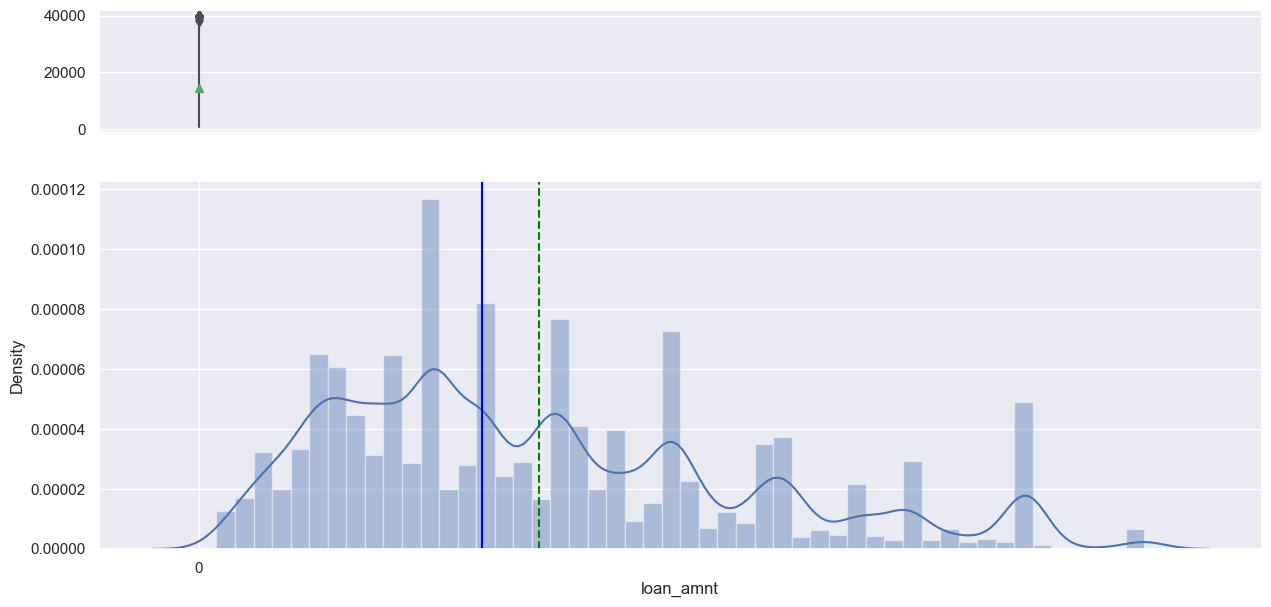

In [67]:
histogram_boxplot(df.loan_amnt)


## revolving balance

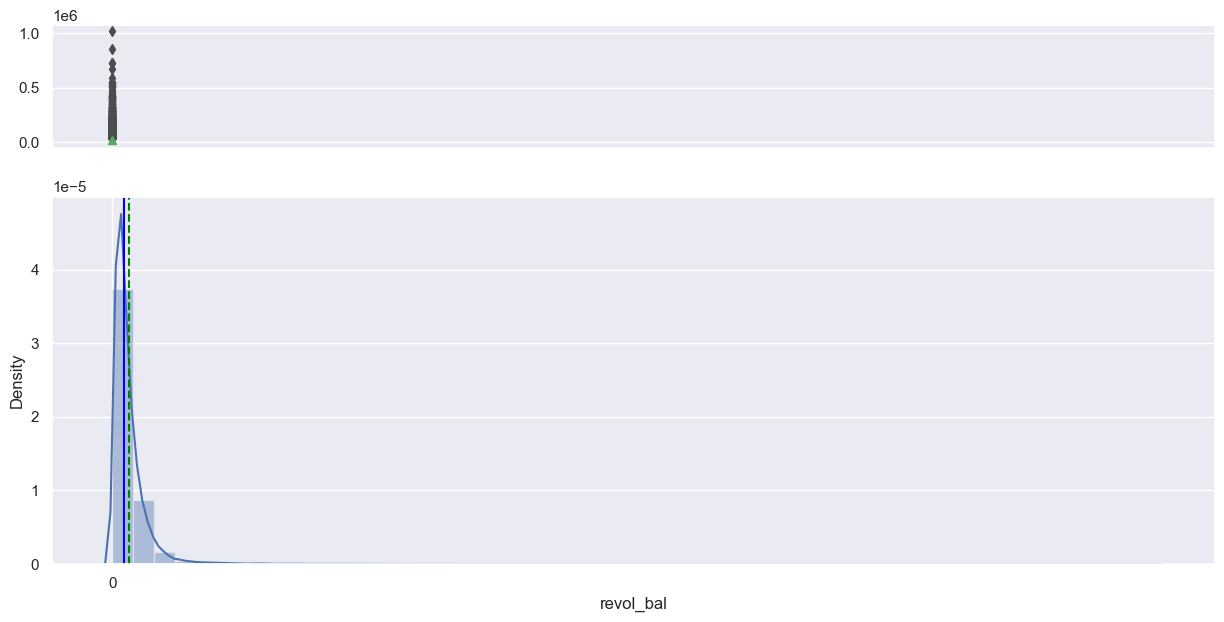

In [68]:
histogram_boxplot(df.revol_bal)


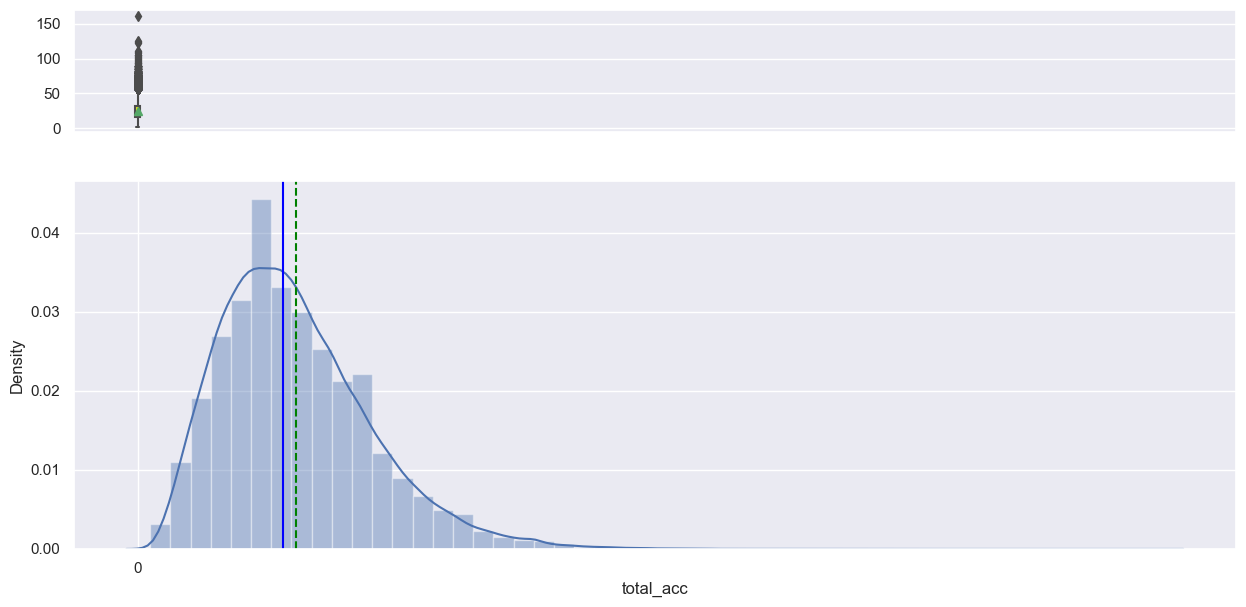

In [69]:
histogram_boxplot(df.total_acc)


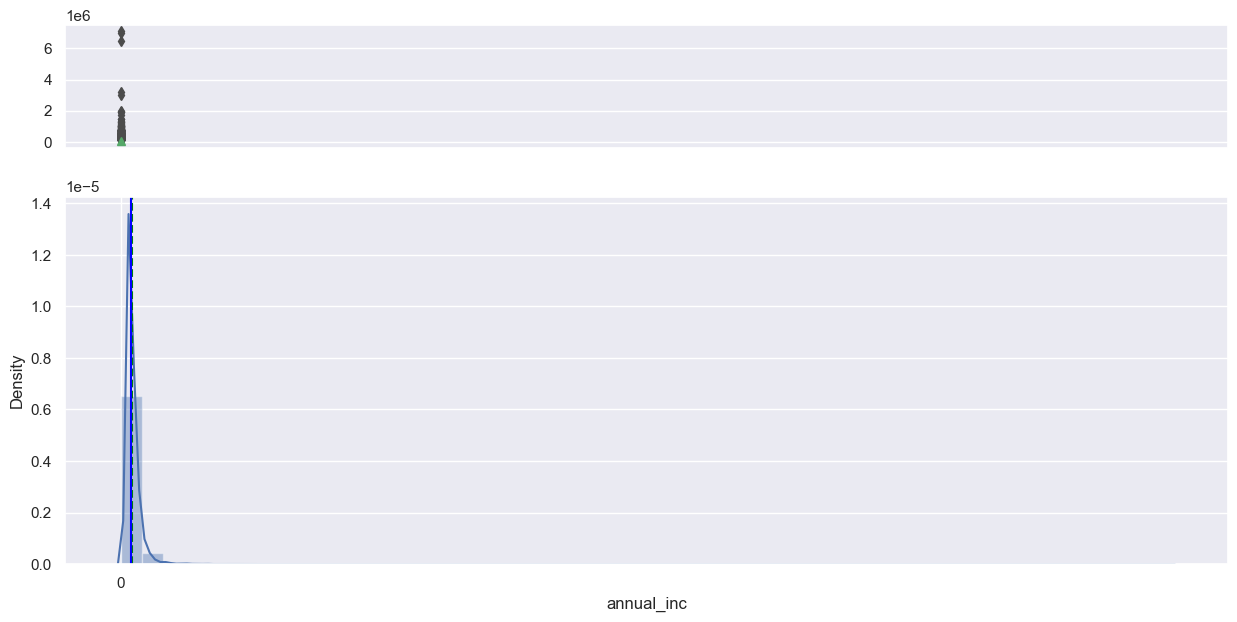

In [70]:
histogram_boxplot(df.annual_inc)


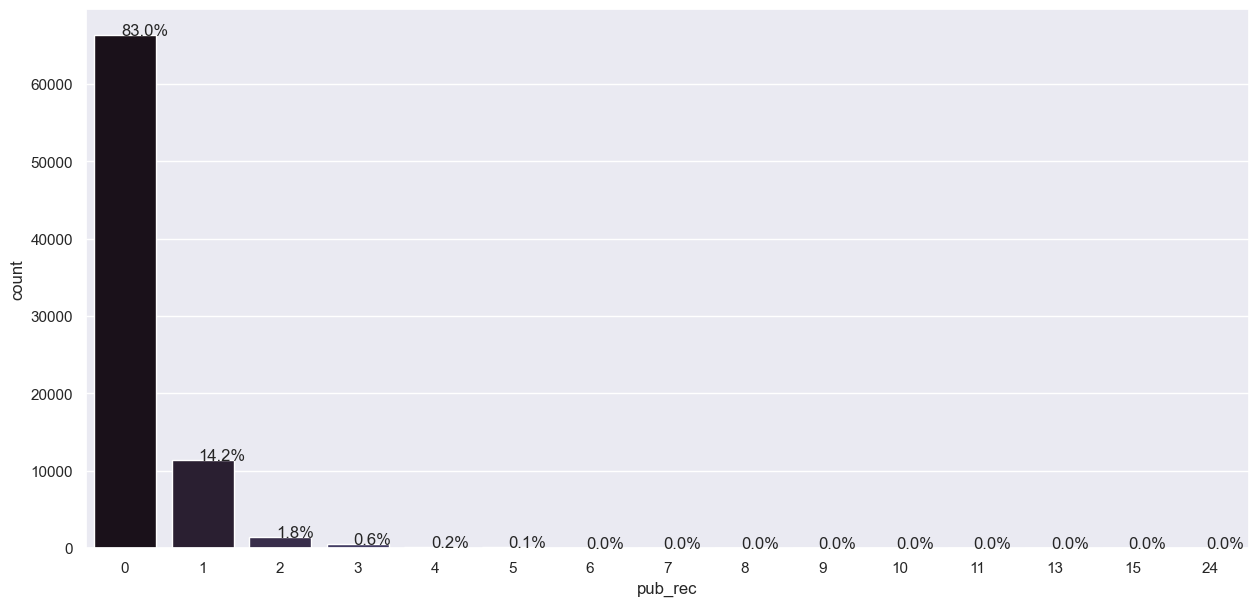

In [71]:
perc_on_bar(df.pub_rec)


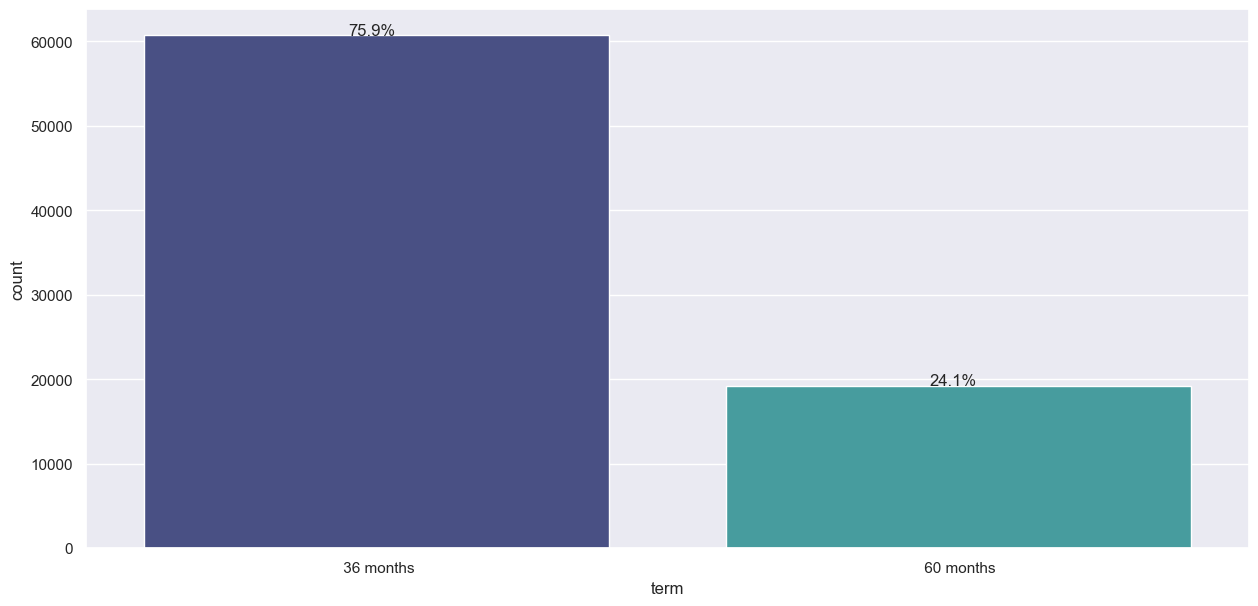

In [72]:
perc_on_bar(df.term)


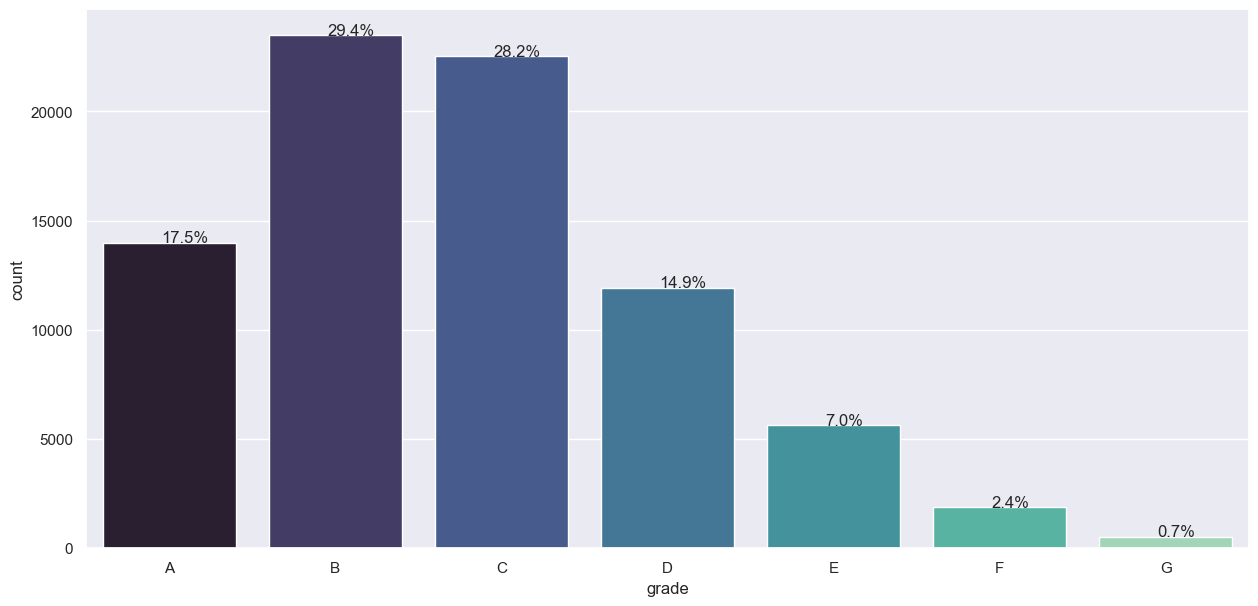

In [73]:
perc_on_bar(df.grade)


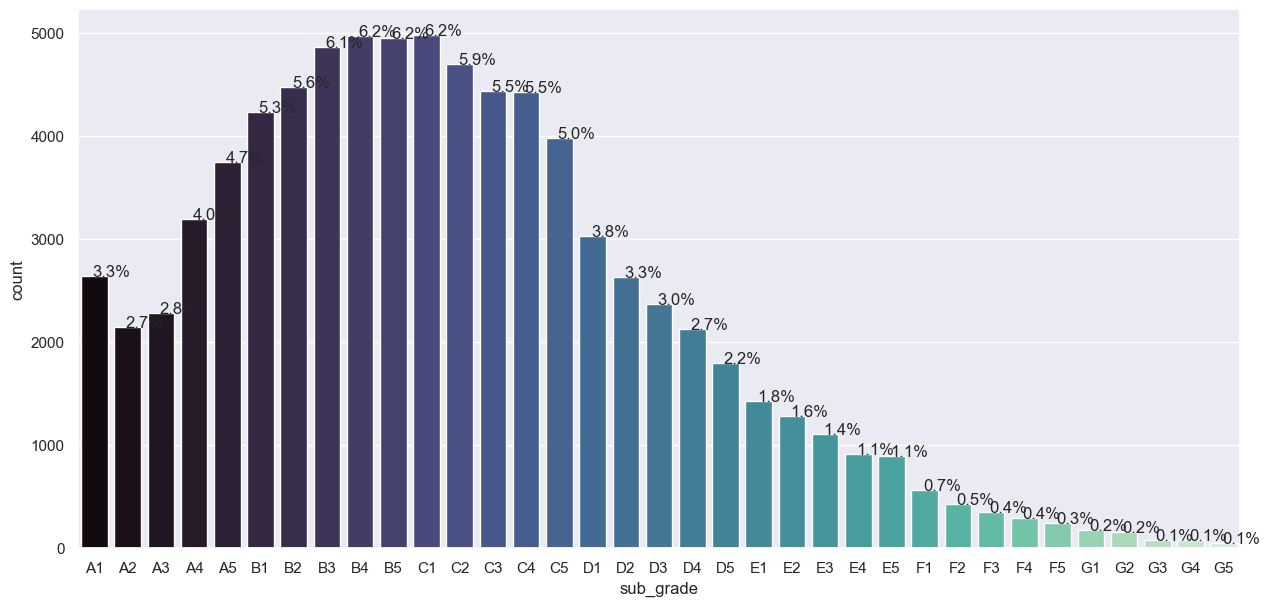

In [74]:
perc_on_bar(df.sub_grade)


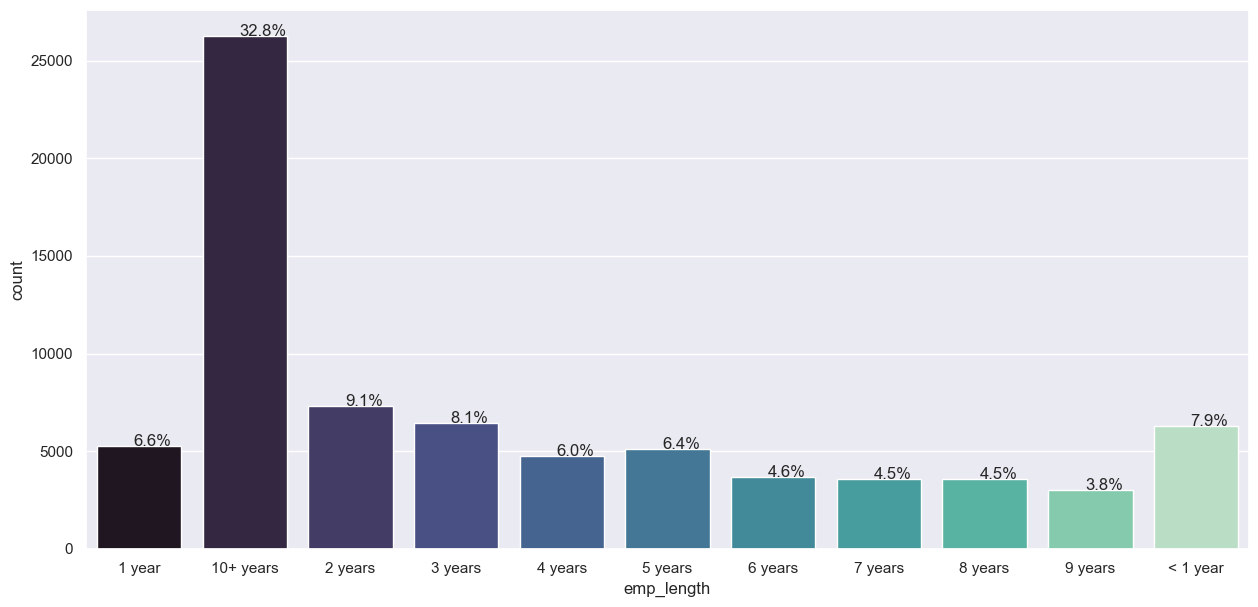

In [75]:
# employee tenure

perc_on_bar(df.emp_length)


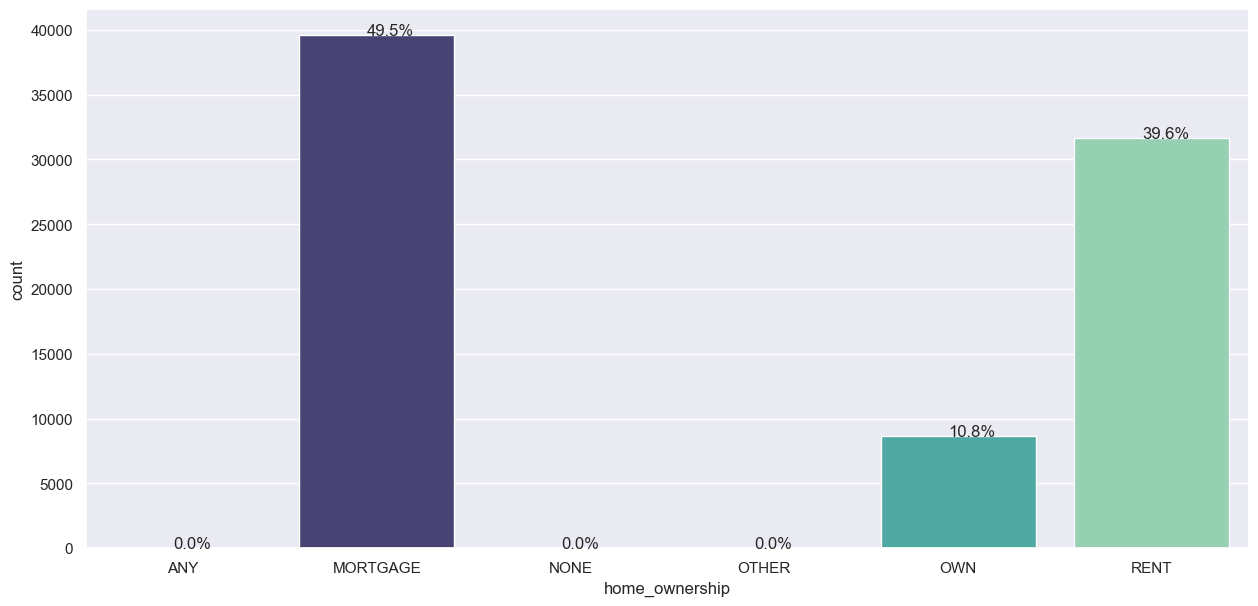

In [76]:
perc_on_bar(df.home_ownership)


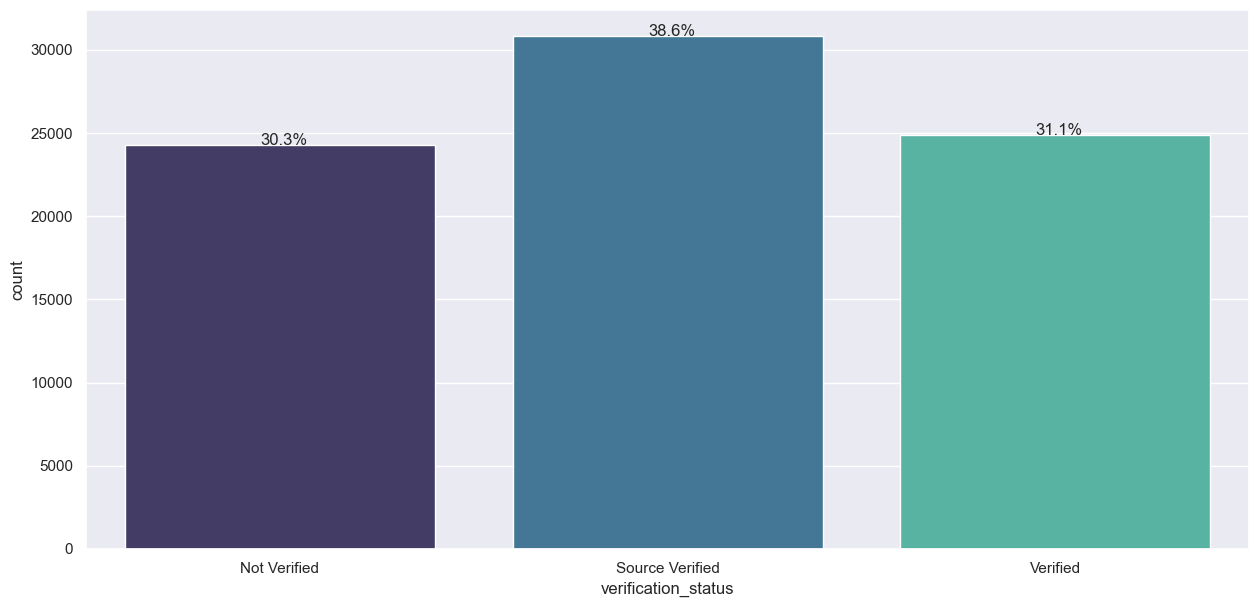

In [77]:
perc_on_bar(df.verification_status)


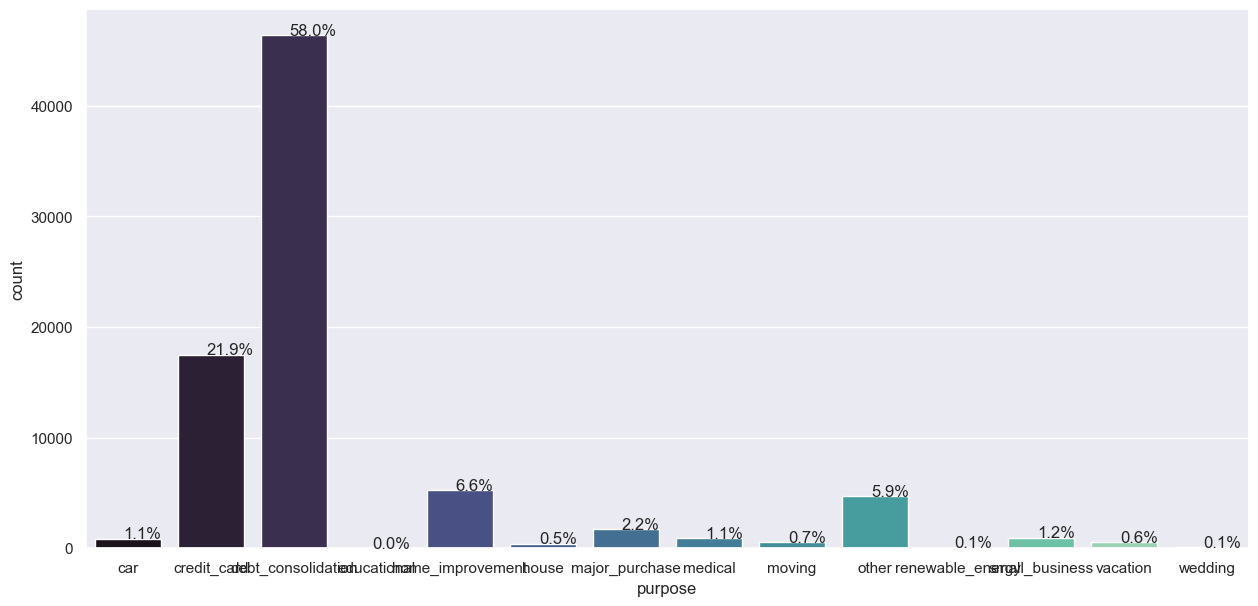

In [78]:
perc_on_bar(df.purpose)


# Bivariate Analysis

In [79]:
## Function to plot stacked bar chart
def stacked_plot(x, y, show_df=True):
    """
    Shows stacked plot from x and y pandas data series
    x: pandas data series
    y: pandas data series
    show_df: flag to show dataframe above plot (loan_status=True)
    """
    if show_df == True:
        info = pd.crosstab(x, y, margins=True)
        info['% - 0'] = round(info[0]/info['All']*100, 2)
        info['% - 1'] = round(info[1]/info['All']*100, 2)
        display(info)
        
    pd.crosstab(x, y, normalize='index').plot(kind='bar', stacked=True, figsize=(10,5));

In [80]:
def show_boxplots(cols: list, feature: str, show_fliers=True, data=df): #method call to show bloxplots
    """
    Shows boxplots from pandas data series
    cols: list of column names
    feature: dataframe categorical feature
    """
    n_rows = math.ceil(len(cols)/3)
    plt.figure(figsize=(15, n_rows*5))
    for i, variable in enumerate(cols):
        plt.subplot(n_rows, 3, i+1)
        if show_fliers:
            sns.boxplot(data[feature], data[variable], palette="mako", showfliers=True) 
        else:
            sns.boxplot(data[feature], data[variable], palette="mako", showfliers=False)
        plt.tight_layout()
        plt.title(variable, fontsize=12)
    plt.show()

In [81]:
### Function to plot distributions and Boxplots of customers
def plot_target(x, target='loan_status'):
    fig,axs = plt.subplots(2,2,figsize=(12,10))
    axs[0, 0].set_title('Distribution of loan_status')
    sns.distplot(data[(data[target] == 1)][x], ax=axs[0,0], color='teal')
    axs[0, 1].set_title('Distribution of NON-loan_status')
    sns.distplot(data[(data[target] == 0)][x],ax=axs[0,1], color='orange')
    axs[1,0].set_title('Boxplot w.r.t loan_status-flag')
    sns.boxplot(data[target],data[x],ax=axs[1,0], palette='mako')
    axs[1,1].set_title('Boxplot w.r.t loan_status-flag - Without outliers')
    sns.boxplot(data[target],data[x], ax=axs[1,1], showfliers=False, palette='mako')
    plt.tight_layout()
    plt.show()

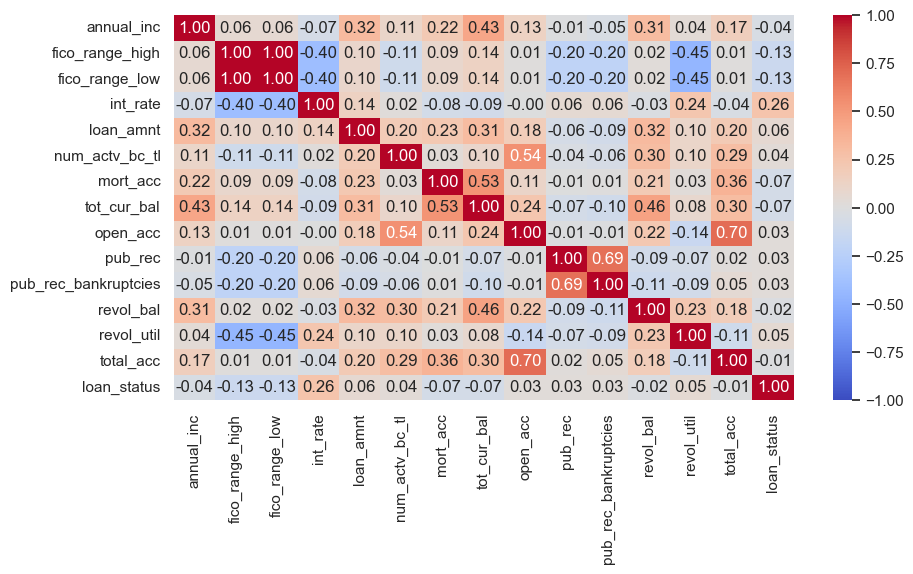

In [82]:
# Filter out non-numeric columns
numeric_df = df.select_dtypes(include=['float64', 'int64'])

# Plot correlation matrix
plt.figure(figsize=(10, 5))
sns.heatmap(numeric_df.corr(), annot=True, vmin=-1, vmax=1, fmt='.2f', cmap='coolwarm')
plt.show()


### loan_status vs grade

loan_status,0,1,All,% - 0,% - 1
grade,,,,,
A,13177,819,13996,94.150,5.850
B,20328,3174,23502,86.490,13.510
C,17448,5077,22525,77.460,22.540
D,8288,3648,11936,69.440,30.560
E,3464,2156,5620,61.640,38.360
F,1046,839,1885,55.490,44.510
G,279,257,536,52.050,47.950
All,64030,15970,80000,80.040,19.960


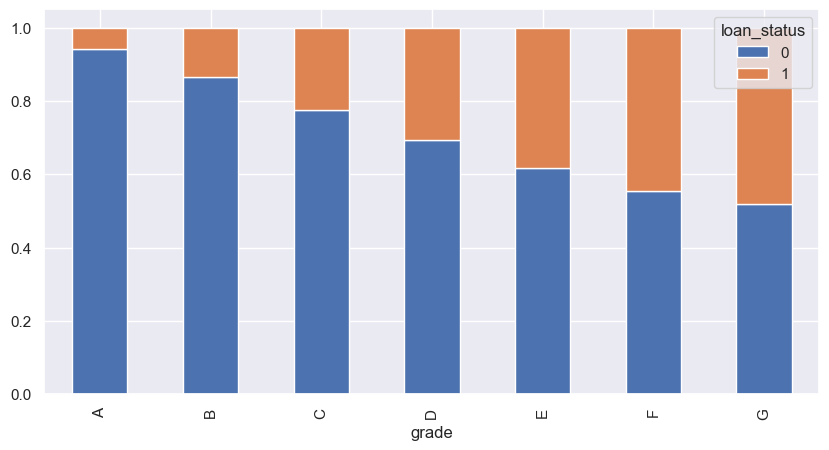

In [83]:
stacked_plot(df.grade, df.loan_status)


### loan_status vs loan_subgrade


loan_status,0,1,All,% - 0,% - 1
sub_grade,,,,,
A1,2545,94,2639,96.440,3.560
A2,2047,100,2147,95.340,4.660
A3,2152,126,2278,94.470,5.530
A4,2971,218,3189,93.160,6.840
A5,3462,281,3743,92.490,7.510
B1,3783,453,4236,89.310,10.690
B2,3950,527,4477,88.230,11.770
B3,4235,631,4866,87.030,12.970
B4,4225,748,4973,84.960,15.040


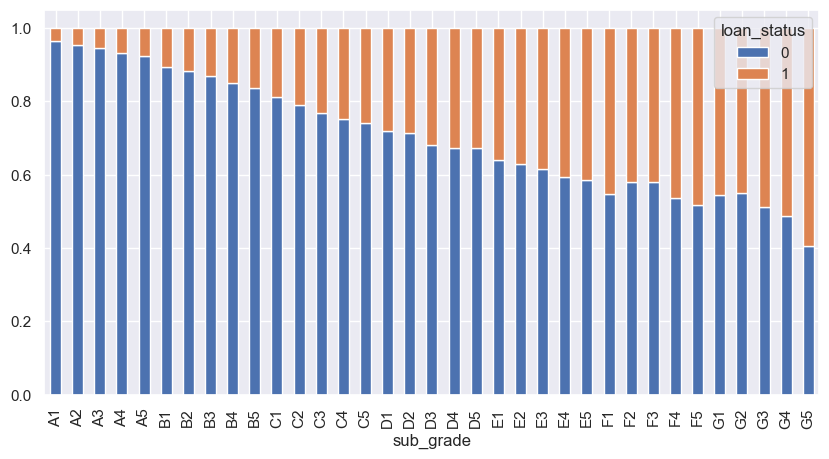

In [84]:
stacked_plot(df.sub_grade, df.loan_status)


loan_status,0,1,All,% - 0,% - 1
emp_length,,,,,
1 year,4244,1050,5294,80.170,19.830
10+ years,21315,4963,26278,81.110,18.890
2 years,5852,1467,7319,79.960,20.040
3 years,5212,1262,6474,80.510,19.490
4 years,3815,948,4763,80.100,19.900
5 years,4095,999,5094,80.390,19.610
6 years,2969,722,3691,80.440,19.560
7 years,2849,748,3597,79.200,20.800
8 years,2868,715,3583,80.040,19.960


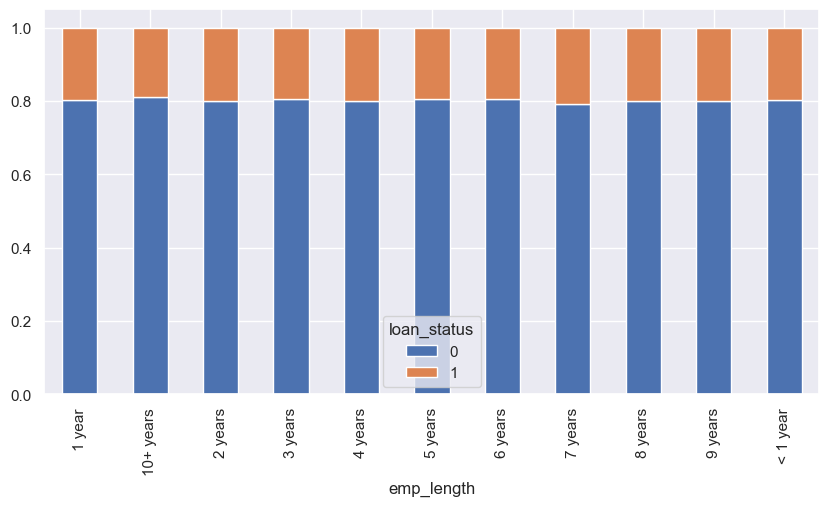

In [85]:

stacked_plot(df.emp_length, df.loan_status)


loan_status,0,1,All,% - 0,% - 1
addr_state,,,,,
AK,191,24,215,88.840,11.160
AL,740,246,986,75.050,24.950
AR,450,140,590,76.270,23.730
AZ,1608,385,1993,80.680,19.320
CA,9409,2335,11744,80.120,19.880
CO,1520,270,1790,84.920,15.080
CT,942,201,1143,82.410,17.590
DC,177,24,201,88.060,11.940
DE,172,47,219,78.540,21.460


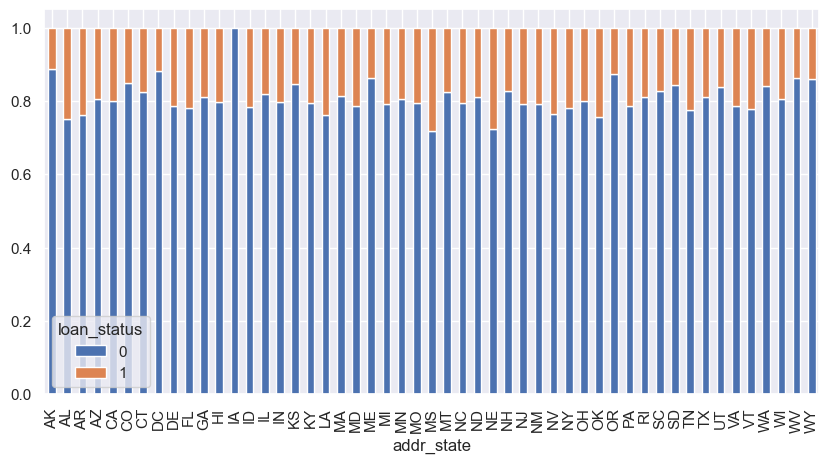

In [86]:
stacked_plot(df.addr_state, df.loan_status)


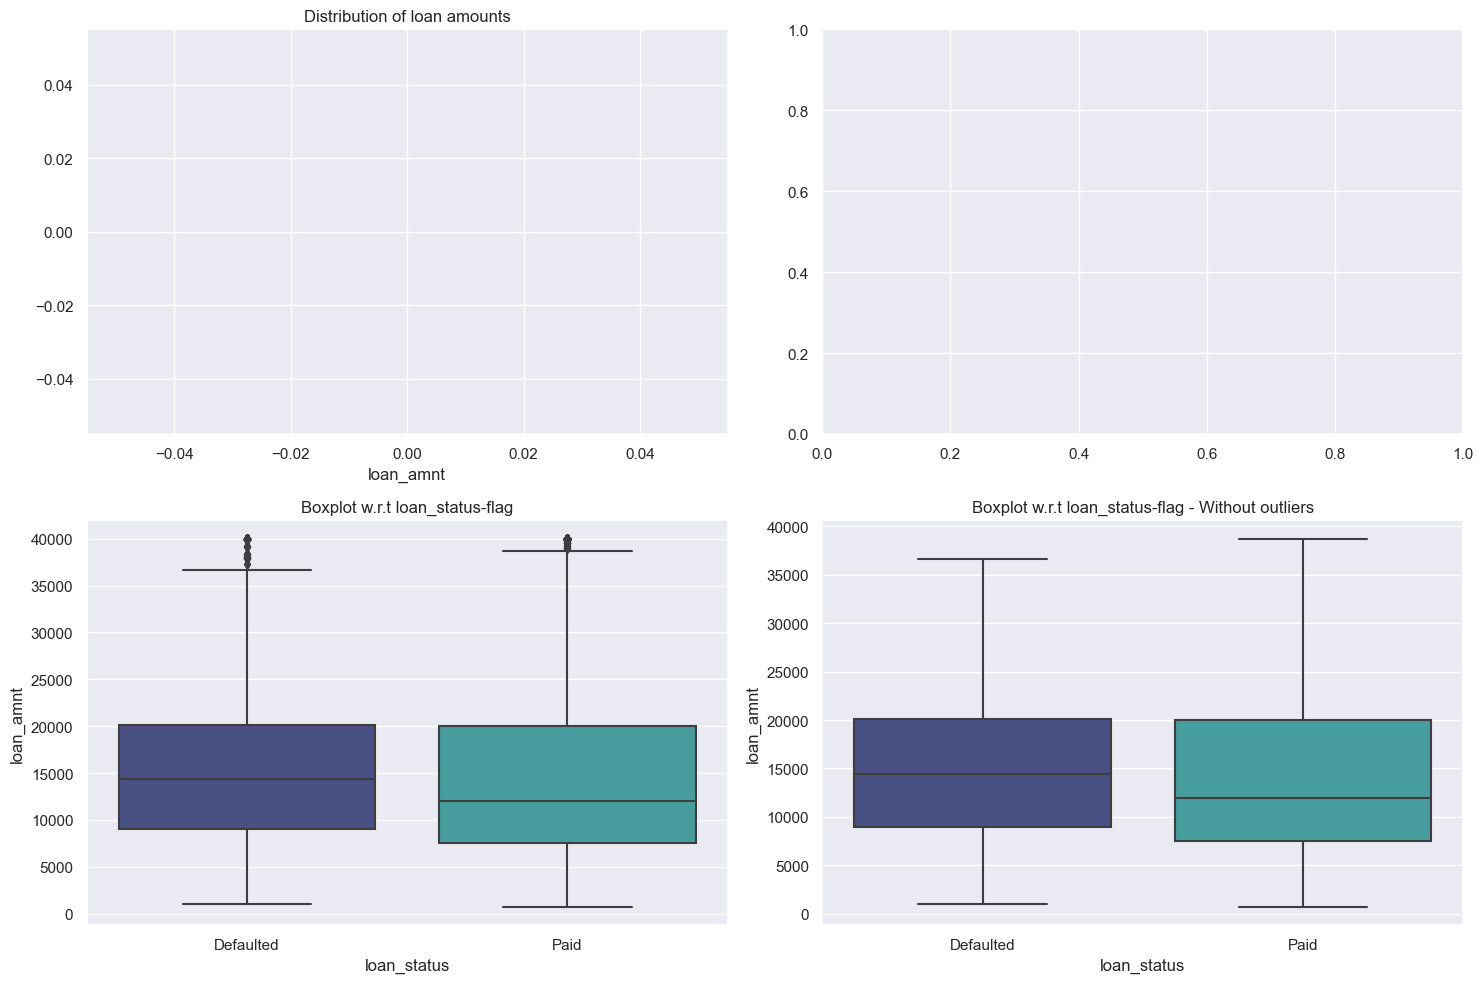

In [87]:
import seaborn as sns
import matplotlib.pyplot as plt

def plot_target(x, target, data):
    fig, axs = plt.subplots(2, 2, figsize=(15, 10))

    sns.distplot(data[data[target] == 1][x], ax=axs[0, 0], color='blue', label='Paid')
    sns.distplot(data[data[target] == 0][x], ax=axs[0, 0], color='orange', label='Defaulted')
    axs[0, 0].set_title('Distribution of loan amounts')

    sns.boxplot(x=data[target], y=data[x], ax=axs[1, 0], palette='mako')
    axs[1, 0].set_title('Boxplot w.r.t loan_status-flag')

    sns.boxplot(x=data[target], y=data[x], ax=axs[1, 1], showfliers=False, palette='mako')
    axs[1, 1].set_title('Boxplot w.r.t loan_status-flag - Without outliers')

    plt.tight_layout()
    plt.show()

# Example usage:
# 'loan_amnt' is the feature for which you want to plot boxplots
# 'loan_status' is the target variable
# 'data' is your DataFrame

plot_target(x='loan_amnt', target='loan_status', data=data)


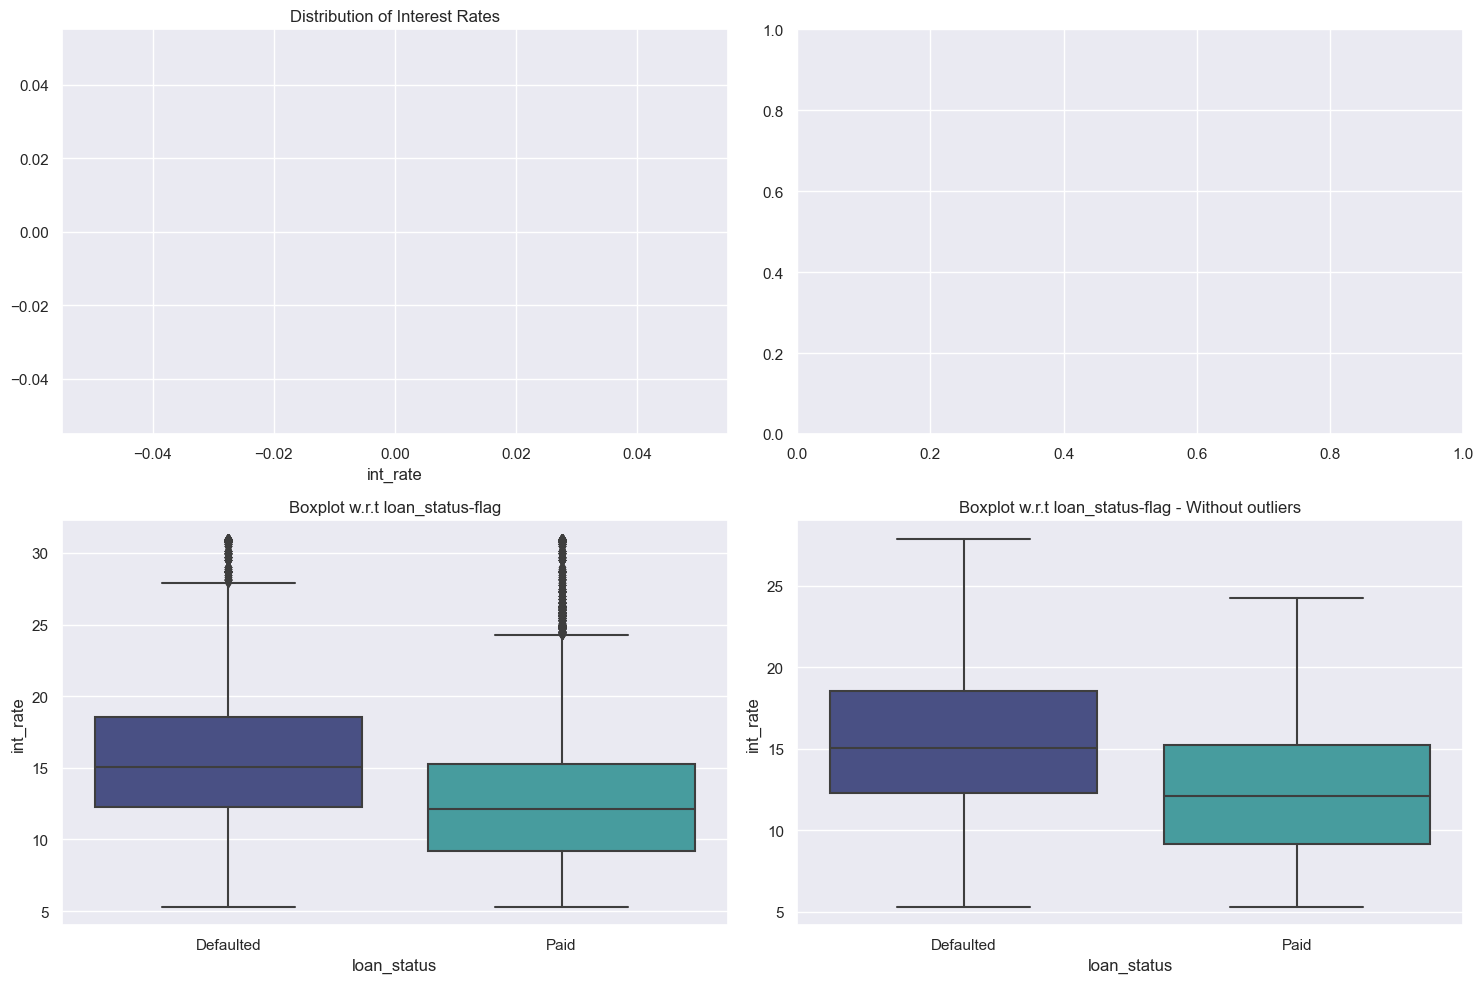

In [88]:
import seaborn as sns
import matplotlib.pyplot as plt

def plot_int_rate(target, data):
    fig, axs = plt.subplots(2, 2, figsize=(15, 10))

    sns.distplot(data[data[target] == 1]['int_rate'], ax=axs[0, 0], color='blue', label='Paid')
    sns.distplot(data[data[target] == 0]['int_rate'], ax=axs[0, 0], color='orange', label='Defaulted')
    axs[0, 0].set_title('Distribution of Interest Rates')

    sns.boxplot(x=data[target], y=data['int_rate'], ax=axs[1, 0], palette='mako')
    axs[1, 0].set_title('Boxplot w.r.t loan_status-flag')

    sns.boxplot(x=data[target], y=data['int_rate'], ax=axs[1, 1], showfliers=False, palette='mako')
    axs[1, 1].set_title('Boxplot w.r.t loan_status-flag - Without outliers')

    plt.tight_layout()
    plt.show()

# Example usage:
# 'loan_status' is the target variable
# 'data' is your DataFrame

plot_int_rate(target='loan_status', data=data)



In [89]:
df.isnull().sum()


addr_state                 0
annual_inc                 0
earliest_cr_line           0
emp_length              4588
emp_title               5018
fico_range_high            0
fico_range_low             0
grade                      0
home_ownership             0
application_type           0
initial_list_status        0
int_rate                   0
loan_amnt                  0
num_actv_bc_tl          3948
mort_acc                2771
tot_cur_bal             3948
open_acc                   0
pub_rec                    0
pub_rec_bankruptcies      31
purpose                    0
revol_bal                  0
revol_util                53
sub_grade                  0
term                       0
title                    970
total_acc                  0
verification_status        0
loan_status                0
dtype: int64

In [90]:
for i in df.select_dtypes(include=['category']).columns:
    print('Unique values in', i, 'are :')
    print(df[i].value_counts(dropna=False))
    print('*'*50)

Unique values in addr_state are :
addr_state
CA    11744
TX     6493
NY     6461
FL     5618
IL     3098
NJ     2853
PA     2676
OH     2575
GA     2530
NC     2291
VA     2249
MI     2091
AZ     1993
MA     1862
MD     1802
CO     1790
WA     1736
MN     1414
IN     1329
MO     1298
NV     1224
TN     1207
CT     1143
WI     1043
OR     1025
SC     1007
AL      986
LA      928
KY      836
OK      725
KS      649
AR      590
UT      554
NM      440
HI      404
MS      373
NH      373
RI      356
WV      268
NE      240
MT      229
DE      219
AK      215
DC      201
SD      192
WY      187
VT      181
ME      110
ID      106
ND       85
IA        1
Name: count, dtype: int64
**************************************************
Unique values in earliest_cr_line are :
earliest_cr_line
Sep-03    547
Aug-03    545
Aug-01    544
Oct-01    541
Sep-02    539
         ... 
Jul-65      1
Sep-59      1
Sep-65      1
Jul-64      1
Nov-66      1
Name: count, Length: 640, dtype: int64
****************

# Feature Engineering, scaling and selection

In [108]:
df5 = df.copy()

In [109]:
addr_state = {'AK':0,  'AL':1,  'AR':2,  'AZ':3,  'CA':4 , 'CO':5,  'CT':6,  'DC':7,  'DE':8, 
              'FL':9,  'GA':10, 'HI':11, 'IA':12, 'ID':13, 'IL':14, 'IN':15, 'KS':16, 'KY':17, 
              'LA':18, 'MA':19, 'MD':20, 'ME':21, 'MI':22, 'MN':23, 'MO':24, 'MS':25, 'MT':26, 
              'NC':27, 'ND':28, 'NE':29, 'NH':30, 'NJ':31, 'NM':32, 'NV':33, 'NY':34, 'OH':35, 
              'OK':36, 'OR':37, 'PA':38, 'RI':39, 'SC':40, 'SD':41, 'TN':42, 'TX':43, 'UT':44, 
              'VA':45, 'VT':46, 'WA':47, 'WI':48, 'WV':49, 'WY':50}
df5['addr_state'] = df5['addr_state'].map(addr_state).astype('Int32')

In [110]:
print(df5.addr_state)


0         5
1         4
2         9
3        14
4        20
         ..
79995    40
79996    30
79997    34
79998    43
79999    34
Name: addr_state, Length: 80000, dtype: Int32


In [112]:
home_ownership = {'MORTGAGE':0, 'RENT':1, 'OWN':2, 'OTHER':3, 'NONE':4}
df5['home_ownership'] = df5['home_ownership'].map(home_ownership).astype('Int32')

In [115]:
# Define the mapping dictionary
emp_length_mapping = {'< 1 year': 0, '1 year': 0, '2 years': 0, '3 years': 0, '4 years': 0,
                      '5 years': 0, '6 years': 1, '7 years': 1, '8 years': 1, '9 years': 1,
                      '10+ years': 2, 'NaN': -1}  # Use -1 to represent unknown or missing values

# Map the values in the DataFrame
df5['emp_length'] = df5['emp_length'].map(emp_length_mapping).astype('Int32')


In [118]:
grade = {'A':0, 'B':1, 'C':2, 'D':3, 'E':4, 'F':5, 'G':6}
df5['grade'] = df5['grade'].map(grade).astype('Int32')

In [121]:
sub_grade = {'A1':0,  'A2':1,  'A3':2,  'A4':3,  'A5':4, 
                 'B1':5,  'B2':6,  'B3':7,  'B4':8,  'B5':9, 
                 'C1':10, 'C2':11, 'C3':12, 'C4':13, 'C5':14,
                 'D1':15, 'D2':16, 'D3':17, 'D4':18, 'D5':19,
                 'E1':20, 'E2':21, 'E3':22, 'E4':23, 'E5':24,
                 'F1':25, 'F2':26, 'F3':27, 'F4':28, 'F5':29,
                 'G1':30, 'G2':31, 'G3':32, 'G4':33, 'G5':34}
df5['sub_grade'] = df5['sub_grade'].map(sub_grade).astype('Int32')

In [123]:
# Step 1: Remove 'months' from the 'term' column
df5['term'] = df5['term'].str.replace(' months', '')

# Step 2: Convert the column to numeric (int or float)
df5['term'] = pd.to_numeric(df5['term'])


In [124]:
term_mapping = {36: 0, 60: 1}
df5['term'] = df5['term'].map(term_mapping).astype('Int32')

In [125]:
df5.head()

,addr_state,annual_inc,earliest_cr_line,emp_length,emp_title,fico_range_high,fico_range_low,grade,home_ownership,application_type,...,pub_rec_bankruptcies,purpose,revol_bal,revol_util,sub_grade,term,title,total_acc,verification_status,loan_status
0,5,85000.000,Jul-97,2,Deputy,744,740,4,0,Individual,...,0.000,debt_consolidation,5338,93.600,20,1,Debt consolidation,8,Source Verified,1
1,4,40000.000,Apr-87,2,Department of Veterans Affairs,724,720,1,1,Individual,...,0.000,debt_consolidation,19944,60.300,5,0,Credit Loan,12,Verified,0
2,9,60000.000,Aug-07,2,Marble polishing,679,675,1,0,Individual,...,0.000,debt_consolidation,23199,88.500,9,0,Debt consolidation,16,Source Verified,0
3,14,100742.000,Sep-80,2,printer,664,660,1,0,Individual,...,0.000,debt_consolidation,18425,69.000,6,0,Debt consolidation,19,Source Verified,0
4,20,80000.000,Jul-99,2,Southern Mgmt,669,665,5,1,Individual,...,0.000,debt_consolidation,34370,90.000,29,1,Debt Connsolidation,59,Verified,0


In [126]:
for i in df5.select_dtypes(include=['category']).columns:
    print('Unique values in', i, 'are :')
    print(df5[i].value_counts(dropna=False))
    print('*'*50)

Unique values in earliest_cr_line are :
earliest_cr_line
Sep-03    547
Aug-03    545
Aug-01    544
Oct-01    541
Sep-02    539
         ... 
Jul-65      1
Sep-59      1
Sep-65      1
Jul-64      1
Nov-66      1
Name: count, Length: 640, dtype: int64
**************************************************
Unique values in emp_title are :
emp_title
NaN                             5018
Teacher                         1278
Manager                         1194
Owner                            592
RN                               526
                                ... 
Hotel Desk Coordinator             1
Hotel & Travel Credit Union        1
Hot oiler                          1
Hostler                            1
MyBuys                             1
Name: count, Length: 36662, dtype: int64
**************************************************
Unique values in application_type are :
application_type
Individual    78446
Joint App      1554
Name: count, dtype: int64
**********************************

In [127]:
# Define mapping for purpose column
purpose_mapping = {'debt_consolidation': 0, 
                   'credit_card': 1, 
                   'home_improvement': 2, 
                   'other': 3,
                   'major_purchase': 4,
                   'small_business': 5,
                   'medical': 6,
                   'car': 7,
                   'moving': 8,
                   'vacation': 9,
                   'house': 10,
                   'wedding': 11,
                   'renewable_energy': 12,
                   'educational': 13}

# Map the values in the DataFrame
df5['purpose'] = df5['purpose'].map(purpose_mapping).astype('Int32')


In [128]:
print(df5.purpose)


0        0
1        0
2        0
3        0
4        0
        ..
79995    0
79996    0
79997    0
79998    1
79999    0
Name: purpose, Length: 80000, dtype: Int32


In [129]:
# Define mapping for initial_list_status column
initial_list_status_mapping = {'w': 0, 'f': 1}

# Map the values in the DataFrame
df5['initial_list_status'] = df5['initial_list_status'].map(initial_list_status_mapping)


In [131]:
# Define mapping for application_type column
application_type_mapping = {'Individual': 0, 
                             'Joint App': 1}

# Map the values in the DataFrame
df5['application_type'] = df5['application_type'].map(application_type_mapping).astype('Int32')


In [134]:
pd.set_option('display.max_columns', None)

In [135]:
# Define mapping for verification_status column
verification_status_mapping = {
    'Source Verified': 0,
    'Verified': 1,
    'Not Verified': 2
}

# Map the values in the DataFrame
df5['verification_status'] = df5['verification_status'].map(verification_status_mapping).astype('Int32')


In [138]:
df5.isnull().sum()

addr_state                 0
annual_inc                 0
earliest_cr_line           0
emp_length              4588
emp_title               5018
fico_range_high            0
fico_range_low             0
grade                      0
home_ownership            19
application_type           0
initial_list_status        0
int_rate                   0
loan_amnt                  0
num_actv_bc_tl          3948
mort_acc                2771
tot_cur_bal             3948
open_acc                   0
pub_rec                    0
pub_rec_bankruptcies      31
purpose                    0
revol_bal                  0
revol_util                53
sub_grade                  0
term                       0
title                    970
total_acc                  0
verification_status        0
loan_status                0
dtype: int64

In [139]:
df5['num_actv_bc_tl'].fillna(df1['num_actv_bc_tl'].mean(), inplace=True)
df5['mort_acc'].fillna(df1['mort_acc'].mean(), inplace=True)
df5['tot_cur_bal'].fillna(df1['tot_cur_bal'].mean(), inplace=True)
df5['emp_length'].fillna(0, inplace=True)
revol_util_mean = df5['revol_util'].mean()
df5['revol_util'].fillna(revol_util_mean, inplace=True)


In [140]:
df5.isnull().sum()

addr_state                 0
annual_inc                 0
earliest_cr_line           0
emp_length                 0
emp_title               5018
fico_range_high            0
fico_range_low             0
grade                      0
home_ownership            19
application_type           0
initial_list_status        0
int_rate                   0
loan_amnt                  0
num_actv_bc_tl             0
mort_acc                   0
tot_cur_bal                0
open_acc                   0
pub_rec                    0
pub_rec_bankruptcies      31
purpose                    0
revol_bal                  0
revol_util                 0
sub_grade                  0
term                       0
title                    970
total_acc                  0
verification_status        0
loan_status                0
dtype: int64

In [141]:
# Replace null values in 'home_ownership' with 3
df5['home_ownership'] = df5['home_ownership'].fillna(3)



In [147]:
# Drop specified columns
df5.drop(['emp_title', 'title', 'earliest_cr_line'], axis=1, inplace=True)


In [148]:
df5.head()

,addr_state,annual_inc,emp_length,fico_range_high,fico_range_low,grade,home_ownership,application_type,initial_list_status,int_rate,loan_amnt,num_actv_bc_tl,mort_acc,tot_cur_bal,open_acc,pub_rec,pub_rec_bankruptcies,purpose,revol_bal,revol_util,sub_grade,term,total_acc,verification_status,loan_status
0,5,85000.000,2,744,740,4,0,0,0,18.990,18075,1.000,1.000,319479.000,7,0,0.000,0,5338,93.600,20,1,8,0,1
1,4,40000.000,2,724,720,1,1,0,0,10.160,8800,4.000,0.000,19944.000,5,0,0.000,0,19944,60.300,5,0,12,1,0
2,9,60000.000,2,679,675,1,0,0,0,11.470,18000,4.000,2.000,23199.000,7,0,0.000,0,23199,88.500,9,0,16,0,0
3,14,100742.000,2,664,660,1,0,0,0,9.160,20000,4.000,1.000,72651.000,12,0,0.000,0,18425,69.000,6,0,19,0,0
4,20,80000.000,2,669,665,5,1,0,1,23.830,35000,14.000,7.000,64631.000,23,0,0.000,0,34370,90.000,29,1,59,1,0


#  Model Training Starts here



In [149]:
imputer = KNNImputer(n_neighbors=5)


In [150]:
X = df5.drop(['loan_status'], axis=1)
y = df5['loan_status']

In [151]:
# Splitting data into training and test set:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=7, stratify=y)
print(X_train.shape, X_test.shape)

(56000, 24) (24000, 24)


In [152]:
#Fit and transform the train data
X_train = pd.DataFrame(imputer.fit_transform(X_train), columns=X_train.columns)

In [153]:
X_test = pd.DataFrame(imputer.transform(X_test),columns=X_test.columns)


In [154]:
#Checking that no column has missing values in train or test sets
print(X_train.isna().sum())
print('-'*30)
print(X_test.isna().sum())

addr_state              0
annual_inc              0
emp_length              0
fico_range_high         0
fico_range_low          0
grade                   0
home_ownership          0
application_type        0
initial_list_status     0
int_rate                0
loan_amnt               0
num_actv_bc_tl          0
mort_acc                0
tot_cur_bal             0
open_acc                0
pub_rec                 0
pub_rec_bankruptcies    0
purpose                 0
revol_bal               0
revol_util              0
sub_grade               0
term                    0
total_acc               0
verification_status     0
dtype: int64
------------------------------
addr_state              0
annual_inc              0
emp_length              0
fico_range_high         0
fico_range_low          0
grade                   0
home_ownership          0
application_type        0
initial_list_status     0
int_rate                0
loan_amnt               0
num_actv_bc_tl          0
mort_acc            

In [162]:
import numpy as np

def inverse_mapping(x, y):
    # Create a mapping from numerical values to original categories
    inv_dict = {v: k for k, v in x.items()}
    
    # Convert the categorical column to numerical
    X_train[y] = X_train[y].astype(float)
    X_test[y] = X_test[y].astype(float)
    
    # Round the numerical values
    X_train[y] = np.round(X_train[y])
    X_test[y] = np.round(X_test[y])
    
    # Map the rounded numerical values back to original categories
    X_train[y] = X_train[y].map(inv_dict).astype('category')
    X_test[y] = X_test[y].map(inv_dict).astype('category')


In [167]:
import numpy as np

def inverse_mapping(x, y):
    # Create a mapping from numerical values to original categories
    inv_dict = {v: k for k, v in x.items()}
    
    # Preprocess the column to convert string values to numerical
    if y == 'emp_length':
        X_train[y] = X_train[y].replace({'< 1 year': 0, '10+ years': 10}).astype(float)
        X_test[y] = X_test[y].replace({'< 1 year': 0, '10+ years': 10}).astype(float)
    elif y == 'term':
        X_train[y] = X_train[y].replace({'36 months': 0, '60 months': 1}).astype(float)
        X_test[y] = X_test[y].replace({'36 months': 0, '60 months': 1}).astype(float)
    elif y in ['grade', 'sub_grade', 'home_ownership', 'verification_status', 'purpose', 'application_type']:
        X_train[y] = X_train[y].astype(float)
        X_test[y] = X_test[y].astype(float)
    
    # Round the numerical values
    X_train[y] = np.round(X_train[y])
    X_test[y] = np.round(X_test[y])
    
    # Map the rounded numerical values back to original categories
    X_train[y] = X_train[y].map(inv_dict).astype('category')
    X_test[y] = X_test[y].map(inv_dict).astype('category')


In [168]:
cols = X_train.select_dtypes(include=['object','category'])
for i in cols.columns:
    print(X_train[i].value_counts(dropna=False))
    print('*'*30)

emp_length
<5 Years      27953
10+ years     18353
6-10 years     9694
Name: count, dtype: int64
******************************
grade
B    16531
C    15715
A     9705
D     8400
E     3945
F     1324
G      380
Name: count, dtype: int64
******************************
home_ownership
MORTGAGE    27559
RENT        22294
OWN          6126
OTHER          17
NONE            4
Name: count, dtype: int64
******************************
term
3 years    42576
5 years    13424
Name: count, dtype: int64
******************************


## Encoding categorical variables


In [169]:
X_train = pd.get_dummies(X_train, drop_first=True)
X_test = pd.get_dummies(X_test, drop_first=True)
print(X_train.shape, X_test.shape)

(56000, 33) (24000, 32)


In [170]:
X_train.columns


Index(['addr_state', 'annual_inc', 'fico_range_high', 'fico_range_low',
       'application_type', 'initial_list_status', 'int_rate', 'loan_amnt',
       'num_actv_bc_tl', 'mort_acc', 'tot_cur_bal', 'open_acc', 'pub_rec',
       'pub_rec_bankruptcies', 'purpose', 'revol_bal', 'revol_util',
       'sub_grade', 'total_acc', 'verification_status',
       'emp_length_6-10 years', 'emp_length_<5 Years', 'grade_B', 'grade_C',
       'grade_D', 'grade_E', 'grade_F', 'grade_G', 'home_ownership_NONE',
       'home_ownership_OTHER', 'home_ownership_OWN', 'home_ownership_RENT',
       'term_5 years'],
      dtype='object')

# Model Building


In [171]:
##  Function to calculate different metric scores of the model - Accuracy, Recall and Precision
def get_metrics_score(model, flag=True):
    '''
    model : classifier to predict values of X
    flag: Flag to print metric score dataframe. (default=True)
    '''
    # defining an empty list to store train and test results
    scores = []   
    pred_train = model.predict(X_train)
    pred_test = model.predict(X_test)
    train_acc = model.score(X_train,y_train)
    test_acc = model.score(X_test,y_test)
    train_recall = metrics.recall_score(y_train,pred_train)
    test_recall = metrics.recall_score(y_test,pred_test)
    train_precision = metrics.precision_score(y_train,pred_train)
    test_precision = metrics.precision_score(y_test,pred_test)
    train_f1 = f1_score(y_train,pred_train)
    test_f1 = f1_score(y_test,pred_test)
    scores.extend(
        (
            train_acc, test_acc, 
            train_recall, test_recall, 
            train_precision, test_precision,
            train_f1, test_f1
        )
    )  
    
    # If the flag is set to True then only the following print statements will be dispayed. The default value is set to True.
    if flag == True:
        metric_names = [
            'Train Accuracy', 'Test Accuracy', 'Train Recall', 'Test Recall',
            'Train Precision', 'Test Precision', 'Train F1-Score', 'Test F1-Score'
        ]
        cols = ['Metric', 'Score']
        records = [(name, score) for name, score in zip(metric_names, scores)]
        display(pd.DataFrame.from_records(records, columns=cols, index='Metric').T)

    return scores # returning the list with train and test scores

In [172]:
## Function to create confusion matrix
def make_confusion_matrix(model,  y_actual, labels=[1, 0], xtest=X_test):
    """
    model : classifier to predict values of X
    y_actual : ground truth  
    """
    y_predict = model.predict(xtest)
    cm = metrics.confusion_matrix(y_actual, y_predict, labels=[0, 1])
    df_cm = pd.DataFrame(cm, index=["Yes", "No"], columns=["Yes", "No"])
    
    group_counts = [f"{value:0.0f}" for value in cm.flatten()]   
    group_percentages = [f"{value:.2%}" for value in cm.flatten()/np.sum(cm)]
    
    labels = [f"{gc}\n{gp}" for gc, gp in zip(group_counts, group_percentages)]  
    labels = np.asarray(labels).reshape(2,2)
    
    plt.figure(figsize = (10, 7))
    sns.heatmap(df_cm, annot=labels, fmt='')
    plt.ylabel("Actual", fontsize=14)
    plt.xlabel("Predicted", fontsize=14);

In [173]:
def show_model_performance(model: list, model_names: list):
    results = []
    for model, name in zip(models, model_names):
        (acc_train, acc_test,
         recall_train, recall_test,
         precision_train, precision_test,
         f1_train, f1_test) = get_metrics_score(model, False)
    
        results.append((name, acc_train, acc_test, recall_train, recall_test,
                    precision_train, precision_test, f1_train, f1_test))

    cols = [
        'Model', 'Train Acc', 'Test Accuracy', 'Train Recall', 
        'Test Recall', 'Train Precision', 'Test Precision', 
        'Train F1-Score', 'Test F1-Score'
    ]

    comparison_frame = pd.DataFrame.from_records(results, columns=cols, index='Model') 
    # Sorting models in decreasing order of test f1-score
    display(comparison_frame.sort_values(by='Test F1-Score', ascending=False))

# Cross Validation Scores


In [174]:
lr = LogisticRegression(random_state=1)
lr.fit(X_train, y_train)

LogisticRegression(random_state=1)

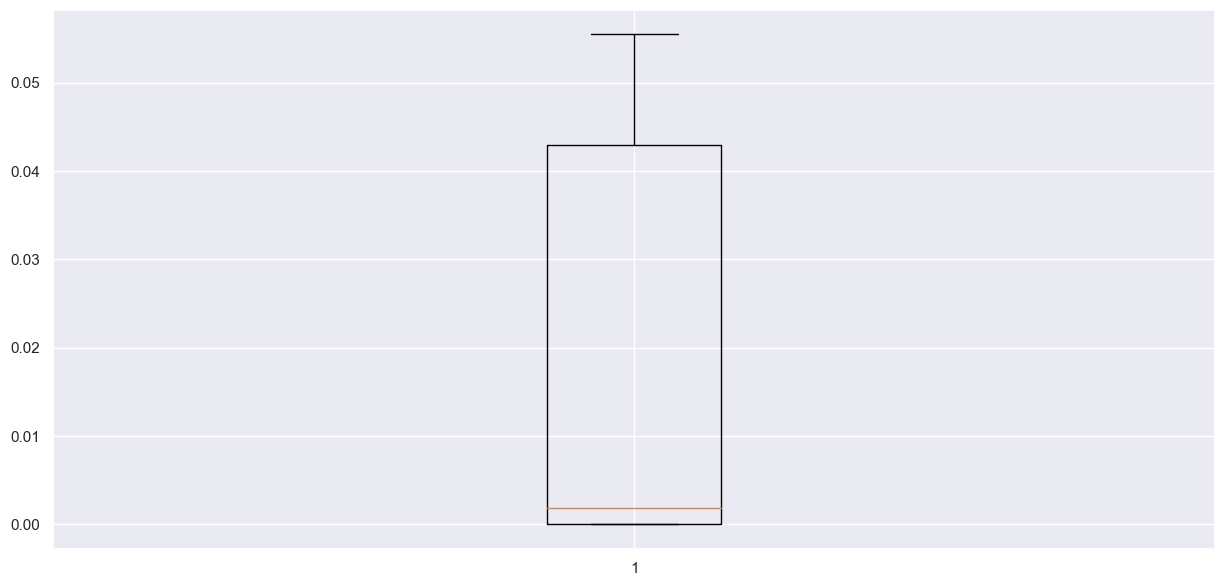

In [175]:
scoring = 'recall'
#Setting number of splits equal to 5
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=1)     
cv_result_bfr = cross_val_score(estimator=lr, X=X_train, y=y_train, scoring=scoring, cv=kfold)
#Plotting boxplots for CV scores of model defined above
plt.boxplot(cv_result_bfr);

In [177]:
import pandas as pd

# Assuming X_test is your test data DataFrame
# Check if the column 'home_ownership_NONE' exists
if 'home_ownership_NONE' not in X_test.columns:
    # If the column doesn't exist, add it with appropriate values
    X_test['home_ownership_NONE'] = 0  # or any default value you want to assign

# Now, the 'home_ownership_NONE' column exists in your test data with appropriate values


In [192]:
get_metrics_score(lr)


Metric,Train Accuracy,Test Accuracy,Train Recall,Test Recall,Train Precision,Test Precision,Train F1-Score,Test F1-Score
Score,0.800,0.800,0.000,0.000,0.000,0.000,0.000,0.000


[0.800375, 0.800375, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]

## Oversampling train data


In [193]:
from imblearn.over_sampling import SMOTE

print("Before UpSampling, counts of label 'Yes': {}".format(sum(y_train==1)))
print("Before UpSampling, counts of label 'No': {} \n".format(sum(y_train==0)))

sm = SMOTE(sampling_strategy = 1 ,k_neighbors = 5, random_state=1)   #Synthetic Minority Over Sampling Technique
X_train_over, y_train_over = sm.fit_resample(X_train, y_train)

print("After UpSampling, counts of label 'Yes': {}".format(sum(y_train_over==1)))
print("After UpSampling, counts of label 'No': {} \n".format(sum(y_train_over==0)))

print('After UpSampling, the shape of train_X: {}'.format(X_train_over.shape))
print('After UpSampling, the shape of train_y: {} \n'.format(y_train_over.shape))

Before UpSampling, counts of label 'Yes': 11179
Before UpSampling, counts of label 'No': 44821 

After UpSampling, counts of label 'Yes': 44821
After UpSampling, counts of label 'No': 44821 

After UpSampling, the shape of train_X: (89642, 33)
After UpSampling, the shape of train_y: (89642,) 



In [181]:
log_reg_over = LogisticRegression(random_state=1)

# Training the basic logistic regression model with the training set 
log_reg_over.fit(X_train_over, y_train_over)

LogisticRegression(random_state=1)

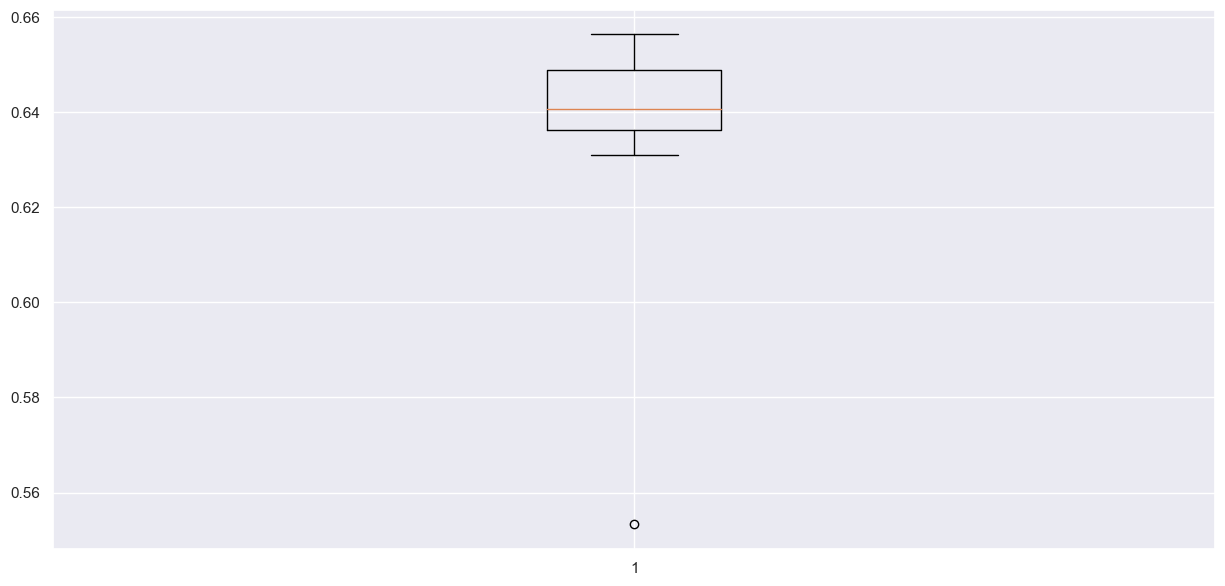

In [182]:
scoring = 'recall'
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=1)     #Setting number of splits equal to 5
cv_result_over = cross_val_score(estimator=log_reg_over, X=X_train_over, y=y_train_over, scoring=scoring, cv=kfold)
#Plotting boxplots for CV scores of model defined above
plt.boxplot(cv_result_over);

In [194]:
get_metrics_score(log_reg_over)


Metric,Train Accuracy,Test Accuracy,Train Recall,Test Recall,Train Precision,Test Precision,Train F1-Score,Test F1-Score
Score,0.651,0.659,0.614,0.626,0.311,0.320,0.413,0.423


[0.651375,
 0.6595,
 0.6144556758207353,
 0.6257566270089752,
 0.3110678380581469,
 0.31971846006185345,
 0.4130362887465801,
 0.4232072275550536]

#  Regularisation

In [185]:
# Choose the type of classifier. 
lr_estimator = LogisticRegression(random_state=1)

# Grid of parameters to choose from
parameters = {'C': np.arange(0.1, 1.1, 0.1)}

# Run the grid search
grid_obj = GridSearchCV(lr_estimator, parameters, scoring='recall', n_jobs=-1)
grid_obj = grid_obj.fit(X_train_over, y_train_over)

# Set the clf to the best combination of parameters
lr_estimator = grid_obj.best_estimator_

# Fit the best algorithm to the data. 
lr_estimator.fit(X_train_over, y_train_over)

LogisticRegression(C=0.30000000000000004, random_state=1)

In [187]:
# Assuming X_train and X_test are your train and test data DataFrames
# Assuming lr_estimator is your trained logistic regression model

# 1. Check if the test data contains all the columns present during model training
missing_columns = set(X_train.columns) - set(X_test.columns)
if missing_columns:
    # If there are missing columns, add them to the test data with appropriate values
    for col in missing_columns:
        X_test[col] = 0  # or any default value you want to assign

# 2. Ensure that the order of columns in the test data matches the order in the training data
X_test = X_test[X_train.columns]

# Now, the test data should have the same columns and column order as the training data
# You should be able to use lr_estimator.predict(X_test) without any issues


In [195]:
get_metrics_score(lr_estimator)


Metric,Train Accuracy,Test Accuracy,Train Recall,Test Recall,Train Precision,Test Precision,Train F1-Score,Test F1-Score
Score,0.649,0.657,0.618,0.628,0.310,0.318,0.413,0.423


[0.6486607142857143,
 0.6570833333333334,
 0.6183916271580642,
 0.6284700480066792,
 0.3096944718215214,
 0.31825388436740304,
 0.4127040983851228,
 0.422537187763121]

In [196]:
models = []  # Empty list to store all the models

# Appending pipelines for each model into the list

models.append(
    (
        "DTREE",
        Pipeline(
            steps=[
                ("scaler", StandardScaler()),
                ("decision_tree", DecisionTreeClassifier(random_state=1)),
            ]
        ),
    )
)


models.append(
    (
        "BAGGING",
        Pipeline(
            steps=[
                ("scaler", StandardScaler()),
                ("random_forest", BaggingClassifier(random_state=1)),
            ]
        ),
    )
)


models.append(
    (
        "RF",
        Pipeline(
            steps=[
                ("scaler", StandardScaler()),
                ("random_forest", RandomForestClassifier(random_state=1)),
            ]
        ),
    )
)

models.append(
    (
        "ADB",
        Pipeline(
            steps=[
                ("scaler", StandardScaler()),
                ("adaboost", AdaBoostClassifier(random_state=1)),
            ]
        ),
    )
)


models.append(
    (
        "GBM",
        Pipeline(
            steps=[
                ("scaler", StandardScaler()),
                ("gradient_boosting", GradientBoostingClassifier(random_state=1)),
            ]
        ),
    )
)


models.append(
    (
        "XGB",
        Pipeline(
            steps=[
                ("scaler", StandardScaler()),
                ("xgboost", XGBClassifier(random_state=1, eval_metric='logloss')),
            ]
        ),
    )
)

results = []  # Empty list to store all model's CV scores
names = []   # Empty list to store name of the models

# loop through all models to get the mean cross validated score
for name, model in models:
    scoring = "recall"
    kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=1)
    cv_result = cross_val_score(estimator=model, X=X_train, y=y_train, scoring=scoring, cv=kfold)
    results.append(cv_result)
    names.append(name)

    print(f"{name}: {cv_result.mean() * 100}")


DTREE: 29.41231345523526
BAGGING: 9.92041156907709
RF: 5.483433584260805
ADB: 4.991443653375915
GBM: 4.5173508142136205
XGB: 10.045563146078207


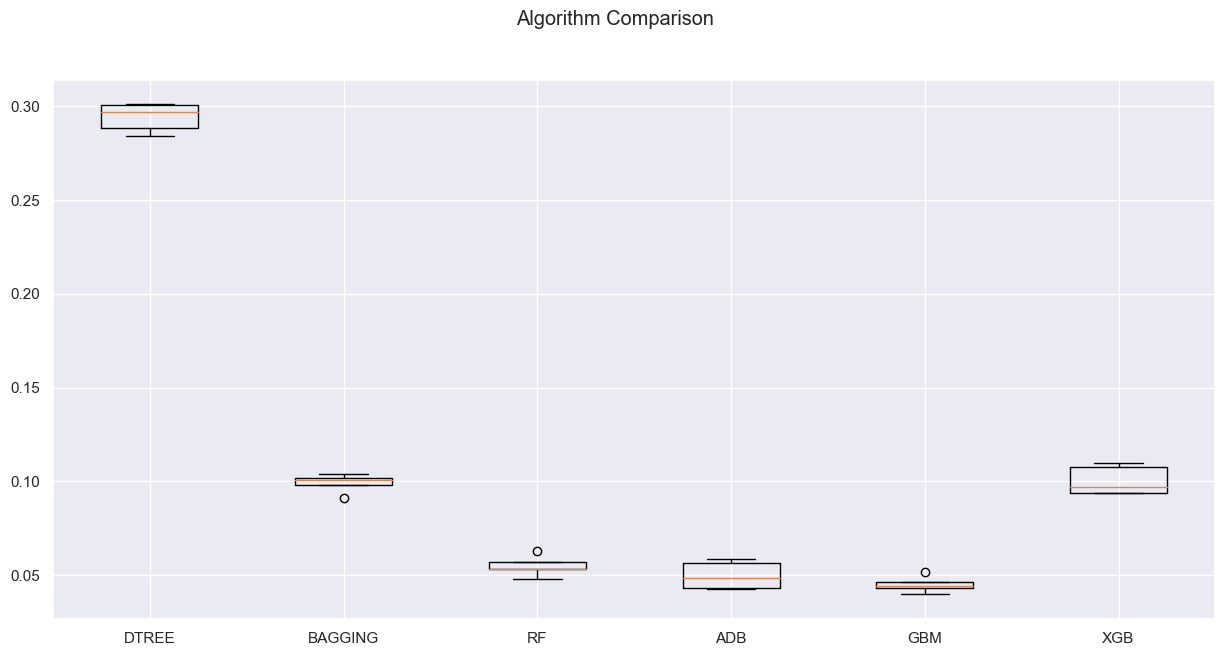

In [197]:
# Plotting boxplots for CV scores of all models defined above
fig = plt.figure(figsize=(15, 7))

fig.suptitle("Algorithm Comparison")
ax = fig.add_subplot(111)

plt.boxplot(results)
ax.set_xticklabels(names);

# XGBoost Classifier


## Hyperparameter Tuning using RandomizedSearchCV


In [198]:
%%time 

#Creating pipeline
pipe=make_pipeline(StandardScaler(),XGBClassifier(random_state=1,eval_metric='logloss', n_estimators=50))

#Parameter grid to pass in RandomizedSearchCV
param_grid={'xgbclassifier__n_estimators':np.arange(50,300,50),
            'xgbclassifier__scale_pos_weight':[0,1,2,5,10],
            'xgbclassifier__learning_rate':[0.01,0.1,0.2,0.05],
            'xgbclassifier__gamma':[0,1,3,5],
            'xgbclassifier__subsample':[0.7,0.8,0.9,1],
            'xgbclassifier__max_depth':np.arange(1,10,1),
            'xgbclassifier__reg_lambda':[0,1,2,5,10]}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.f1_score)

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=pipe, param_distributions=param_grid, n_iter=50, 
                                   scoring=scorer, cv=5, random_state=1, n_jobs=-1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train,y_train)

print(f"Best Parameters:{randomized_cv.best_params_} \nScore: {randomized_cv.best_score_}")

Best Parameters:{'xgbclassifier__subsample': 0.9, 'xgbclassifier__scale_pos_weight': 5, 'xgbclassifier__reg_lambda': 0, 'xgbclassifier__n_estimators': 100, 'xgbclassifier__max_depth': 3, 'xgbclassifier__learning_rate': 0.2, 'xgbclassifier__gamma': 1} 
Score: 0.4191839303895996
CPU times: total: 15.6 s
Wall time: 2min 20s


In [200]:
# Creating new pipeline with best parameters
xgb_tuned = make_pipeline(
    StandardScaler(),
    XGBClassifier(
        random_state=1,
        n_estimators=150,
        scale_pos_weight=2,
        reg_lambda=2,
        max_depth=7,
        subsample=1,
        learning_rate=0.1,
        gamma=0,
        eval_metric='logloss',
        n_jobs=-1
    )
)

# Fit the model on training data
xgb_tuned.fit(X_train, y_train)

#Calculating different metrics
get_metrics_score(xgb_tuned)



Metric,Train Accuracy,Test Accuracy,Train Recall,Test Recall,Train Precision,Test Precision,Train F1-Score,Test F1-Score
Score,0.844,0.778,0.499,0.301,0.641,0.422,0.561,0.351


[0.844125,
 0.7780416666666666,
 0.49932909920386437,
 0.300772281360885,
 0.6405783796190039,
 0.42159157401989467,
 0.5612024330166391,
 0.3510780850286272]

# Decision Tree Classifier


## Hyperparameter Tuning using GridSearchCV


In [201]:
%%time 

# Creating pipeline
pipe = make_pipeline(StandardScaler(), DecisionTreeClassifier(random_state=1))

# Parameter grid to pass in GridSearchCV
param_grid = {
    'decisiontreeclassifier__max_depth': np.arange(2, 30), 
    'decisiontreeclassifier__min_samples_leaf': [1, 2, 5, 7, 10],
    'decisiontreeclassifier__max_leaf_nodes' : [2, 3, 5, 10, 15],
    'decisiontreeclassifier__min_impurity_decrease': [0.0001,0.001,0.01,0.1]
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.f1_score)

# Calling GridSearchCV
grid_cv = GridSearchCV(estimator=pipe, param_grid=param_grid, scoring=scorer, cv=5, n_jobs=-1)

# Fitting parameters in GridSeachCV
grid_cv.fit(X_train, y_train)

print(f"Best parameters are {grid_cv.best_params_} \nScore={grid_cv.best_score_}:")

Best parameters are {'decisiontreeclassifier__max_depth': 2, 'decisiontreeclassifier__max_leaf_nodes': 2, 'decisiontreeclassifier__min_impurity_decrease': 0.0001, 'decisiontreeclassifier__min_samples_leaf': 1} 
Score=0.0:
CPU times: total: 6min 19s
Wall time: 23min 15s


In [202]:
# Creating new pipeline with best parameters
dtree_tuned = make_pipeline(
    StandardScaler(),
    DecisionTreeClassifier(
        max_depth=7,
        max_leaf_nodes=15,
        random_state=1,
        min_impurity_decrease=0.0001,
        min_samples_leaf=1,
    )
)

# Fit the model on training data
dtree_tuned.fit(X_train, y_train)

#Calculating different metrics
get_metrics_score(dtree_tuned)

Metric,Train Accuracy,Test Accuracy,Train Recall,Test Recall,Train Precision,Test Precision,Train F1-Score,Test F1-Score
Score,0.801,0.800,0.003,0.003,0.682,0.571,0.005,0.005


[0.8006607142857143,
 0.8005,
 0.0026836031845424457,
 0.002504696305572949,
 0.6818181818181818,
 0.5714285714285714,
 0.005346164127238707,
 0.004987531172069825]

# Test Set Prediction


In [327]:
test = pd.read_csv('test_loan_data (1).csv')
test.columns

Index(['addr_state', 'annual_inc', 'earliest_cr_line', 'emp_length',
       'emp_title', 'fico_range_high', 'fico_range_low', 'grade',
       'home_ownership', 'application_type', 'initial_list_status', 'int_rate',
       'loan_amnt', 'num_actv_bc_tl', 'mort_acc', 'tot_cur_bal', 'open_acc',
       'pub_rec', 'pub_rec_bankruptcies', 'purpose', 'revol_bal', 'revol_util',
       'sub_grade', 'term', 'title', 'total_acc', 'verification_status'],
      dtype='object')

In [328]:
test.head()

,addr_state,annual_inc,earliest_cr_line,emp_length,emp_title,fico_range_high,fico_range_low,grade,home_ownership,application_type,initial_list_status,int_rate,loan_amnt,num_actv_bc_tl,mort_acc,tot_cur_bal,open_acc,pub_rec,pub_rec_bankruptcies,purpose,revol_bal,revol_util,sub_grade,term,title,total_acc,verification_status
0,MO,50000.000,May-2012,1 year,Tower technician,719.000,715.000,C,OWN,Individual,f,13.990,5000.000,1.000,0.000,33395.000,9.000,0.000,0.000,debt_consolidation,2568.000,9.800,C4,36 months,Debt consolidation,11.000,Source Verified
1,HI,92000.000,Dec-2001,10+ years,Supervisor,684.000,680.000,B,RENT,Individual,f,10.990,30000.000,2.000,2.000,229832.000,11.000,0.000,0.000,debt_consolidation,30394.000,75.400,B2,36 months,Debt consolidation,35.000,Source Verified
2,TX,89000.000,Mar-1989,10+ years,APPLICATIONS PROGRAMMER,679.000,675.000,B,MORTGAGE,Individual,w,10.150,16000.000,5.000,2.000,181616.000,15.000,0.000,0.000,credit_card,38400.000,75.300,B2,60 months,Credit card refinancing,41.000,Not Verified
3,CA,33000.000,Nov-2004,9 years,San Diego Unified School District,674.000,670.000,C,RENT,Individual,f,13.680,10000.000,6.000,0.000,30603.000,12.000,1.000,1.000,debt_consolidation,21224.000,69.400,C1,36 months,Breathing Room,16.000,Not Verified
4,MI,35580.000,Feb-1997,NaN,NaN,704.000,700.000,B,MORTGAGE,Individual,f,14.090,4000.000,2.000,4.000,124597.000,8.000,0.000,0.000,debt_consolidation,3471.000,39.400,B5,36 months,debitconsolidation,19.000,Verified


In [329]:
test2 = test.copy()

In [330]:
addr_state = {'AK':0,  'AL':1,  'AR':2,  'AZ':3,  'CA':4 , 'CO':5,  'CT':6,  'DC':7,  'DE':8, 
              'FL':9,  'GA':10, 'HI':11, 'IA':12, 'ID':13, 'IL':14, 'IN':15, 'KS':16, 'KY':17, 
              'LA':18, 'MA':19, 'MD':20, 'ME':21, 'MI':22, 'MN':23, 'MO':24, 'MS':25, 'MT':26, 
              'NC':27, 'ND':28, 'NE':29, 'NH':30, 'NJ':31, 'NM':32, 'NV':33, 'NY':34, 'OH':35, 
              'OK':36, 'OR':37, 'PA':38, 'RI':39, 'SC':40, 'SD':41, 'TN':42, 'TX':43, 'UT':44, 
              'VA':45, 'VT':46, 'WA':47, 'WI':48, 'WV':49, 'WY':50}
test2['addr_state'] = test2['addr_state'].map(addr_state).astype('Int32')

In [332]:
home_ownership = {'MORTGAGE':0, 'RENT':1, 'OWN':2, 'OTHER':3, 'NONE':4}
test2['home_ownership'] = test2['home_ownership'].map(home_ownership).astype('Int32')

In [334]:
# Define the mapping dictionary
emp_length_mapping = {'< 1 year': 0, '1 year': 0, '2 years': 0, '3 years': 0, '4 years': 0,
                      '5 years': 0, '6 years': 1, '7 years': 1, '8 years': 1, '9 years': 1,
                      '10+ years': 2, 'NaN': -1}  # Use -1 to represent unknown or missing values

# Map the values in the DataFrame
test2['emp_length'] = test2['emp_length'].map(emp_length_mapping).astype('Int32')

In [336]:
grade = {'A':0, 'B':1, 'C':2, 'D':3, 'E':4, 'F':5, 'G':6}
test2['grade'] = test2['grade'].map(grade).astype('Int32')

In [338]:
sub_grade = {'A1':0,  'A2':1,  'A3':2,  'A4':3,  'A5':4, 
                 'B1':5,  'B2':6,  'B3':7,  'B4':8,  'B5':9, 
                 'C1':10, 'C2':11, 'C3':12, 'C4':13, 'C5':14,
                 'D1':15, 'D2':16, 'D3':17, 'D4':18, 'D5':19,
                 'E1':20, 'E2':21, 'E3':22, 'E4':23, 'E5':24,
                 'F1':25, 'F2':26, 'F3':27, 'F4':28, 'F5':29,
                 'G1':30, 'G2':31, 'G3':32, 'G4':33, 'G5':34}
test2['sub_grade'] = test2['sub_grade'].map(sub_grade).astype('Int32')

In [340]:
# Step 1: Remove 'months' from the 'term' column
test2['term'] = test2['term'].str.replace(' months', '')

# Step 2: Convert the column to numeric (int or float)
test2['term'] = pd.to_numeric(test2['term'])


In [341]:
term_mapping = {36: 0, 60: 1}
test2['term'] = test2['term'].map(term_mapping).astype('Int32')

In [342]:
test2.head()

,addr_state,annual_inc,earliest_cr_line,emp_length,emp_title,fico_range_high,fico_range_low,grade,home_ownership,application_type,initial_list_status,int_rate,loan_amnt,num_actv_bc_tl,mort_acc,tot_cur_bal,open_acc,pub_rec,pub_rec_bankruptcies,purpose,revol_bal,revol_util,sub_grade,term,title,total_acc,verification_status
0,24,50000.000,May-2012,0,Tower technician,719.000,715.000,2,2,Individual,f,13.990,5000.000,1.000,0.000,33395.000,9.000,0.000,0.000,debt_consolidation,2568.000,9.800,13,<NA>,Debt consolidation,11.000,0
1,11,92000.000,Dec-2001,2,Supervisor,684.000,680.000,1,1,Individual,f,10.990,30000.000,2.000,2.000,229832.000,11.000,0.000,0.000,debt_consolidation,30394.000,75.400,6,<NA>,Debt consolidation,35.000,0
2,43,89000.000,Mar-1989,2,APPLICATIONS PROGRAMMER,679.000,675.000,1,0,Individual,w,10.150,16000.000,5.000,2.000,181616.000,15.000,0.000,0.000,credit_card,38400.000,75.300,6,<NA>,Credit card refinancing,41.000,2
3,4,33000.000,Nov-2004,1,San Diego Unified School District,674.000,670.000,2,1,Individual,f,13.680,10000.000,6.000,0.000,30603.000,12.000,1.000,1.000,debt_consolidation,21224.000,69.400,10,<NA>,Breathing Room,16.000,2
4,22,35580.000,Feb-1997,<NA>,NaN,704.000,700.000,1,0,Individual,f,14.090,4000.000,2.000,4.000,124597.000,8.000,0.000,0.000,debt_consolidation,3471.000,39.400,9,<NA>,debitconsolidation,19.000,1


In [343]:
for i in tests.select_dtypes(include=['category']).columns:
    print('Unique values in', i, 'are :')
    print(tests[i].value_counts(dropna=False))
    print('*'*50)

In [344]:
# Define mapping for purpose column
purpose_mapping = {'debt_consolidation': 0, 
                   'credit_card': 1, 
                   'home_improvement': 2, 
                   'other': 3,
                   'major_purchase': 4,
                   'small_business': 5,
                   'medical': 6,
                   'car': 7,
                   'moving': 8,
                   'vacation': 9,
                   'house': 10,
                   'wedding': 11,
                   'renewable_energy': 12,
                   'educational': 13}

# Map the values in the DataFrame
test2['purpose'] = test2['purpose'].map(purpose_mapping).astype('Int32')

In [346]:
# Define mapping for initial_list_status column
initial_list_status_mapping = {'w': 0, 'f': 1}

# Map the values in the DataFrame
test2['initial_list_status'] = test2['initial_list_status'].map(initial_list_status_mapping)


In [348]:
# Define mapping for application_type column
application_type_mapping = {'Individual': 0, 
                             'Joint App': 1}

# Map the values in the DataFrame
test2['application_type'] = test2['application_type'].map(application_type_mapping).astype('Int32')


In [349]:
test2.head(10)

,addr_state,annual_inc,earliest_cr_line,emp_length,emp_title,fico_range_high,fico_range_low,grade,home_ownership,application_type,initial_list_status,int_rate,loan_amnt,num_actv_bc_tl,mort_acc,tot_cur_bal,open_acc,pub_rec,pub_rec_bankruptcies,purpose,revol_bal,revol_util,sub_grade,term,title,total_acc,verification_status
0,24,50000.000,May-2012,0,Tower technician,719.000,715.000,2,2,0,1,13.990,5000.000,1.000,0.000,33395.000,9.000,0.000,0.000,0,2568.000,9.800,13,0,Debt consolidation,11.000,Source Verified
1,11,92000.000,Dec-2001,2,Supervisor,684.000,680.000,1,1,0,1,10.990,30000.000,2.000,2.000,229832.000,11.000,0.000,0.000,0,30394.000,75.400,6,0,Debt consolidation,35.000,Source Verified
2,43,89000.000,Mar-1989,2,APPLICATIONS PROGRAMMER,679.000,675.000,1,0,0,0,10.150,16000.000,5.000,2.000,181616.000,15.000,0.000,0.000,1,38400.000,75.300,6,1,Credit card refinancing,41.000,Not Verified
3,4,33000.000,Nov-2004,1,San Diego Unified School District,674.000,670.000,2,1,0,1,13.680,10000.000,6.000,0.000,30603.000,12.000,1.000,1.000,0,21224.000,69.400,10,0,Breathing Room,16.000,Not Verified
4,22,35580.000,Feb-1997,<NA>,NaN,704.000,700.000,1,0,0,1,14.090,4000.000,2.000,4.000,124597.000,8.000,0.000,0.000,0,3471.000,39.400,9,0,debitconsolidation,19.000,Verified
5,24,32510.000,Aug-2000,2,Order processing tech,724.000,720.000,1,0,0,0,9.170,14950.000,5.000,0.000,15111.000,15.000,0.000,0.000,0,15111.000,41.400,6,0,Debt consolidation,25.000,Not Verified
6,31,38000.000,Mar-2006,0,Script Coordinator,814.000,810.000,0,1,0,1,6.720,2800.000,1.000,0.000,15216.000,12.000,0.000,0.000,0,651.000,1.800,2,0,Debt consolidation,16.000,Not Verified
7,9,45000.000,Aug-1991,2,Ruffe Systems Inc,674.000,670.000,2,1,0,0,16.290,19750.000,8.000,0.000,47322.000,14.000,1.000,1.000,1,15643.000,72.800,13,0,Credit Card Payoff,25.000,Verified
8,4,50000.000,Sep-1998,0,Member/Manager,684.000,680.000,3,1,0,0,16.990,9675.000,6.000,0.000,33271.000,12.000,2.000,1.000,0,9048.000,45.000,17,0,Debt consolidation,13.000,Source Verified
9,10,67000.000,Nov-1993,<NA>,NaN,744.000,740.000,1,0,0,0,10.420,5000.000,5.000,7.000,288613.000,14.000,0.000,0.000,0,8149.000,10.300,7,0,Debt consolidation,54.000,Not Verified


In [350]:
# Define mapping for verification_status column
verification_status_mapping = {
    'Source Verified': 0,
    'Verified': 1,
    'Not Verified': 2
}

# Map the values in the DataFrame
test2['verification_status'] = tests['verification_status'].map(verification_status_mapping).astype('Int32')


In [352]:
# Check for null values in each column
null_counts = test2.isnull().sum()

# Print the null counts
print(null_counts)


addr_state                 0
annual_inc                 0
earliest_cr_line           0
emp_length              1258
emp_title               1378
fico_range_high            0
fico_range_low             0
grade                      0
home_ownership             2
application_type           0
initial_list_status        0
int_rate                   0
loan_amnt                  0
num_actv_bc_tl          1011
mort_acc                 704
tot_cur_bal             1011
open_acc                   0
pub_rec                    0
pub_rec_bankruptcies      11
purpose                    0
revol_bal                  0
revol_util                13
sub_grade                  0
term                       0
title                    247
total_acc                  0
verification_status        0
dtype: int64


In [353]:
test2['num_actv_bc_tl'].fillna(test2['num_actv_bc_tl'].mean(), inplace=True)
test2['mort_acc'].fillna(test2['mort_acc'].mean(), inplace=True)
test2['tot_cur_bal'].fillna(test2['tot_cur_bal'].mean(), inplace=True)
test2['emp_length'].fillna(0, inplace=True)
revol_util_mean = test2['revol_util'].mean()
test2['revol_util'].fillna(revol_util_mean, inplace=True)


In [354]:
test2.isnull().sum()

addr_state                 0
annual_inc                 0
earliest_cr_line           0
emp_length                 0
emp_title               1378
fico_range_high            0
fico_range_low             0
grade                      0
home_ownership             2
application_type           0
initial_list_status        0
int_rate                   0
loan_amnt                  0
num_actv_bc_tl             0
mort_acc                   0
tot_cur_bal                0
open_acc                   0
pub_rec                    0
pub_rec_bankruptcies      11
purpose                    0
revol_bal                  0
revol_util                 0
sub_grade                  0
term                       0
title                    247
total_acc                  0
verification_status        0
dtype: int64

In [355]:
# Replace null values in 'home_ownership' with 3
test2['home_ownership'] = test2['home_ownership'].fillna(3)


In [356]:
# Drop specified columns
test2.drop(['emp_title', 'title', 'earliest_cr_line', 'pub_rec_bankruptcies'], axis=1, inplace=True)

In [357]:
imputer = KNNImputer(n_neighbors=5)


In [358]:
print(test2.columns)
test2.shape

Index(['addr_state', 'annual_inc', 'emp_length', 'fico_range_high',
       'fico_range_low', 'grade', 'home_ownership', 'application_type',
       'initial_list_status', 'int_rate', 'loan_amnt', 'num_actv_bc_tl',
       'mort_acc', 'tot_cur_bal', 'open_acc', 'pub_rec', 'purpose',
       'revol_bal', 'revol_util', 'sub_grade', 'term', 'total_acc',
       'verification_status'],
      dtype='object')


(20000, 23)

In [360]:
# Define mapping for verification_status column
verification_status_mapping = {
    'Source Verified': 0,
    'Verified': 1,
    'Not Verified': 2
}

# Map the values in the DataFrame
test2['verification_status'] = test2['verification_status'].map(verification_status_mapping).astype('Int32')


In [367]:
test2.drop(columns=['addr_state'], inplace=True)


In [372]:
test2 = pd.DataFrame(imputer.fit_transform(test2), columns=test2.columns)
test2.head()

,annual_inc,emp_length,fico_range_high,fico_range_low,grade,home_ownership,application_type,initial_list_status,int_rate,loan_amnt,num_actv_bc_tl,mort_acc,tot_cur_bal,open_acc,pub_rec,purpose,revol_bal,revol_util,sub_grade,term,total_acc,verification_status
0,50000.000,0.000,719.000,715.000,2.000,2.000,0.000,1.000,13.990,5000.000,1.000,0.000,33395.000,9.000,0.000,0.000,2568.000,9.800,13.000,0.000,11.000,0.000
1,92000.000,2.000,684.000,680.000,1.000,1.000,0.000,1.000,10.990,30000.000,2.000,2.000,229832.000,11.000,0.000,0.000,30394.000,75.400,6.000,0.000,35.000,0.000
2,89000.000,2.000,679.000,675.000,1.000,0.000,0.000,0.000,10.150,16000.000,5.000,2.000,181616.000,15.000,0.000,1.000,38400.000,75.300,6.000,1.000,41.000,2.000
3,33000.000,1.000,674.000,670.000,2.000,1.000,0.000,1.000,13.680,10000.000,6.000,0.000,30603.000,12.000,1.000,0.000,21224.000,69.400,10.000,0.000,16.000,2.000
4,35580.000,0.000,704.000,700.000,1.000,0.000,0.000,1.000,14.090,4000.000,2.000,4.000,124597.000,8.000,0.000,0.000,3471.000,39.400,9.000,0.000,19.000,1.000


In [374]:
#Checking that no column has missing values in train or test sets
print(test2.isna().sum())

annual_inc             0
emp_length             0
fico_range_high        0
fico_range_low         0
grade                  0
home_ownership         0
application_type       0
initial_list_status    0
int_rate               0
loan_amnt              0
num_actv_bc_tl         0
mort_acc               0
tot_cur_bal            0
open_acc               0
pub_rec                0
purpose                0
revol_bal              0
revol_util             0
sub_grade              0
term                   0
total_acc              0
verification_status    0
dtype: int64


In [375]:
## Function to inverse the encoding
def test_inverse_mapping(x, y):
    inv_dict = {v: k for k, v in x.items()}
    test2[y] = np.round(test[y]).map(inv_dict).astype('category')

In [376]:
import numpy as np

def inverse_mapping(x, y):
    # Create a mapping from numerical values to original categories
    inv_dict = {v: k for k, v in x.items()}
    
    # Convert the categorical column to numerical
    X_train[y] = X_train[y].astype(float)
    X_test[y] = X_test[y].astype(float)
    
    # Round the numerical values
    X_train[y] = np.round(X_train[y])
    X_test[y] = np.round(X_test[y])
    
    # Map the rounded numerical values back to original categories
    X_train[y] = X_train[y].map(inv_dict).astype('category')
    X_test[y] = X_test[y].map(inv_dict).astype('category')

In [377]:
import numpy as np

def inverse_mapping(x, y):
    # Create a mapping from numerical values to original categories
    inv_dict = {v: k for k, v in x.items()}
    
    # Preprocess the column to convert string values to numerical
    if y == 'emp_length':
        X_train[y] = X_train[y].replace({'< 1 year': 0, '10+ years': 10}).astype(float)
        X_test[y] = X_test[y].replace({'< 1 year': 0, '10+ years': 10}).astype(float)
    elif y == 'term':
        X_train[y] = X_train[y].replace({'36 months': 0, '60 months': 1}).astype(float)
        X_test[y] = X_test[y].replace({'36 months': 0, '60 months': 1}).astype(float)
    elif y in ['grade', 'sub_grade', 'home_ownership', 'verification_status', 'purpose', 'application_type']:
        X_train[y] = X_train[y].astype(float)
        X_test[y] = X_test[y].astype(float)
    
    # Round the numerical values
    X_train[y] = np.round(X_train[y])
    X_test[y] = np.round(X_test[y])
    
    # Map the rounded numerical values back to original categories
    X_train[y] = X_train[y].map(inv_dict).astype('category')
    X_test[y] = X_test[y].map(inv_dict).astype('category')

In [379]:
cols = test.select_dtypes(include=['object','category'])
for i in cols.columns:
    print(test[i].value_counts(dropna=False))
    print('*'*30)

earliest_cr_line
Oct-2001    160
Sep-2004    143
Aug-2001    142
Aug-2000    136
Sep-2003    136
           ... 
Mar-1968      1
Nov-1972      1
Jun-1963      1
Jul-1973      1
Dec-1959      1
Name: count, Length: 568, dtype: int64
******************************
emp_length
10+ years    6579
2 years      1810
< 1 year     1583
3 years      1580
1 year       1336
NaN          1258
5 years      1228
4 years      1190
6 years       957
7 years       874
8 years       836
9 years       769
Name: count, dtype: int64
******************************
emp_title
NaN                               1378
Teacher                            357
Manager                            240
Registered Nurse                   142
Owner                              142
                                  ... 
Project Production Coordinator       1
los angeles school district          1
claims adjuster                      1
Graduate Research Assistant          1
rv technician                        1
Name: count, L

In [380]:
test2 = pd.get_dummies(test2, drop_first=True)
test2.shape

(20000, 22)

In [381]:
test2.columns

Index(['annual_inc', 'emp_length', 'fico_range_high', 'fico_range_low',
       'grade', 'home_ownership', 'application_type', 'initial_list_status',
       'int_rate', 'loan_amnt', 'num_actv_bc_tl', 'mort_acc', 'tot_cur_bal',
       'open_acc', 'pub_rec', 'purpose', 'revol_bal', 'revol_util',
       'sub_grade', 'term', 'total_acc', 'verification_status'],
      dtype='object')

pred = xgb_tuned.predict(test)
print(f"Prediction has length: {len(pred)}")

In [ ]:
submit_df.to_csv('Final_submission.csv', index=False)